# Training & Regularization

## Overfitting vs Underfitting

## 🎯 Bias–Variance Trade-off

- **Bias** 🧾: Error due to overly simplistic models → leads to **underfitting** (fails to capture complexity).
- **Variance** 🎢: Error due to overly complex models → leads to **overfitting** (captures noise + patterns).
- **Goal** ⚖️: Find the sweet spot where bias and variance are balanced for best generalization.

---

## 🔍 Overfitting

### 📖 Definition

When a model learns the **training data too well**—capturing noise and outliers—resulting in **poor generalization** on unseen/test data.

### ⚠️ Causes

- Model is **too complex** 🏗️ (too many layers, neurons, or parameters).
- **Too few training samples** 📉 relative to model size.
- **Too many epochs** ⏳ (training for too long).
- **Weak/no regularization** 🚫.

### 📊 Symptoms

- **Low training loss** ✅ but **high validation/test loss** ❌.
- Training accuracy 🎯 ≫ Validation accuracy ❌.

### 🛠️ Solutions

- **Dropout** 🧹 – randomly deactivate neurons during training.
- **Early Stopping** ⏹ – stop training when validation error starts rising.
- **L1/L2 Regularization** 🔗 – penalize large weights.
- **Data Augmentation** 🖼️ – expand dataset artificially.
- **Cross-Validation & Ensembles** 🤝 – bagging, boosting, stacking for stability.

---

## 📉 Underfitting

### 📖 Definition

When a model is **too simple** and cannot capture the structure in data → performs poorly on both training and validation datasets.

### ⚠️ Causes

- Model too basic ➖ (e.g., linear model for non-linear data).
- Insufficient **training epochs** ⏱️.
- Poor **feature selection/engineering** 🔑.
- Learning rate too low 🐢.
- **Over-regularization** ⛓️ or improper feature scaling.

### 📊 Symptoms

- **High training loss** ❌ + **high validation loss** ❌.
- Training accuracy 🔽 and validation accuracy 🔽 (both low).

### 🛠️ Solutions

- Increase **model complexity** 🏗️ (deeper NN, polynomial features).
- Train longer ⏳.
- Add better/more features 🔍.
- Adjust learning rate ⚡.
- Reduce unnecessary regularization 🧰.

---

### 📊 Learning Curves as a Diagnostic Tool

- **Overfitting** 🎭: Training curve improves, but validation curve diverges.
- **Underfitting** 🚧: Both curves plateau at poor performance.
- **Balanced Fit** ⚖️: Training & validation curves improve and converge together.

---

### 🧰 Regularization Techniques (DL Focus)

From the Medium article (Day 49):

1. **Dropout** 🧹 – combats overfitting by deactivating neurons randomly.
2. **Early Stopping** ⏹ – prevents training too long.
3. **L1/L2 Regularization** 🔗 – discourages overly large weights.
4. **Data Augmentation** 🖼️ – increases dataset size & diversity.
5. **Advanced Variants** 🔄 – like DropConnect, Early/Late Dropout to balance under/overfitting.

---

## 📑 Summary Table

| ⚡ Phenomenon | 📊 Symptoms | ⚠️ Causes | 🛠️ Fixes |
| --- | --- | --- | --- |
| **Underfitting** 📉 | High loss (train & val), low accuracy | Model too simple, few epochs, poor features, low LR | More complexity, train longer, better features, adjust LR |
| **Overfitting** 🔍 | Low train loss, high val loss, big accuracy gap | Too complex, too few samples, many epochs, no reg. | Dropout, early stopping, L1/L2, augmentation, ensembles |
| **Balanced Fit** ⚖️ | Train & val accuracy aligned, both high | Balanced bias & variance | Proper tuning + regularization toolkit |

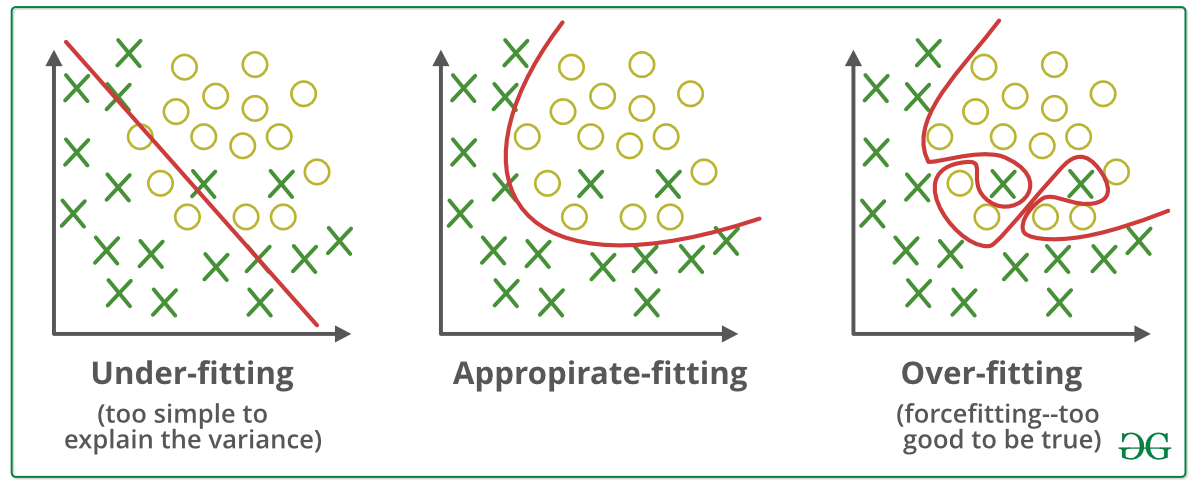

In [4]:
!pip install scikit-learn

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


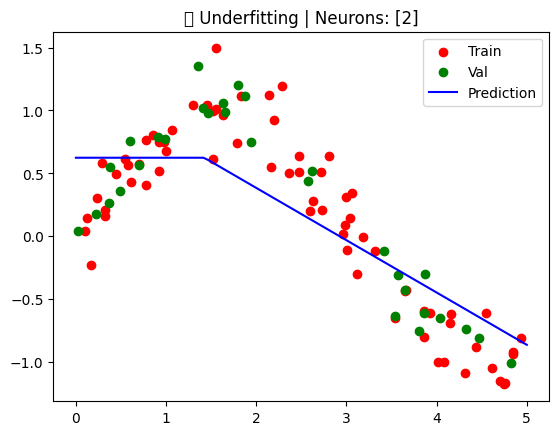

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


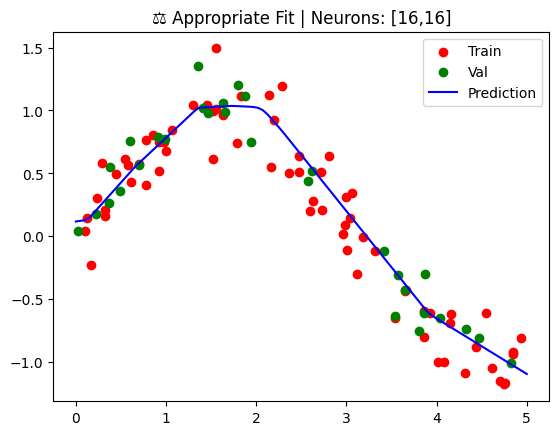

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


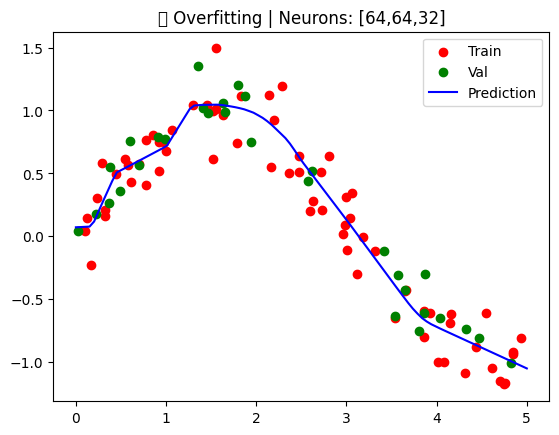

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# 🎯 Generate synthetic dataset
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 5, axis=0)
y = np.sin(X).ravel() + np.random.randn(100) * 0.2

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Helper function: build and train model, plot predictions
def build_and_plot(hidden_layers, epochs, title_prefix):
    model = Sequential()
    for units in hidden_layers:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(0.01), loss='mse')
    
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=epochs, verbose=0)
    
    # Plot predictions
    X_test = np.linspace(0, 5, 100).reshape(-1, 1)
    y_pred = model.predict(X_test)
    
    plt.scatter(X_train, y_train, color='red', label='Train')
    plt.scatter(X_val, y_val, color='green', label='Val')
    plt.plot(X_test, y_pred, color='blue', label='Prediction')
    
    # Show degree (number of neurons in each layer)
    degree_str = ','.join(map(str, hidden_layers))
    plt.title(f"{title_prefix} | Neurons: [{degree_str}]")
    plt.legend()
    plt.show()
    
    return history

# Underfitting
history_under = build_and_plot([2], epochs=100, title_prefix='📉 Underfitting')

# Appropriate Fit
history_good = build_and_plot([16,16], epochs=200, title_prefix='⚖️ Appropriate Fit')

# Overfitting
history_over = build_and_plot([64,64,32], epochs=500, title_prefix='🔍 Overfitting')

Here's a **short explanation** for this deep learning code:

- **Dataset**: 100 points from a sine curve with noise, split into training and validation sets.
- **`build_and_plot` function**:
    - Builds a **neural network** with the specified `hidden_layers`.
    - Uses **ReLU activation** for hidden layers and linear for output.
    - Compiles with **Adam optimizer** and MSE loss.
    - Trains the model and **plots predictions** on training (red) and validation (green) data.
    - **Displays number of neurons** in the title.
- **Three experiments**:
    1. **Underfitting** (`[2]`) → too few neurons → model cannot capture sine curve.
    2. **Appropriate fit** (`[16,16]`) → medium network → fits the curve well.
    3. **Overfitting** (`[64,64,32]`) → too many neurons → fits noise → poor generalization.
- The **plots** visually show how network complexity affects fit, demonstrating **bias-variance tradeoff**.

This code effectively illustrates **underfitting, good fit, and overfitting** in a neural network.

## Training loss VS Validation loss curves

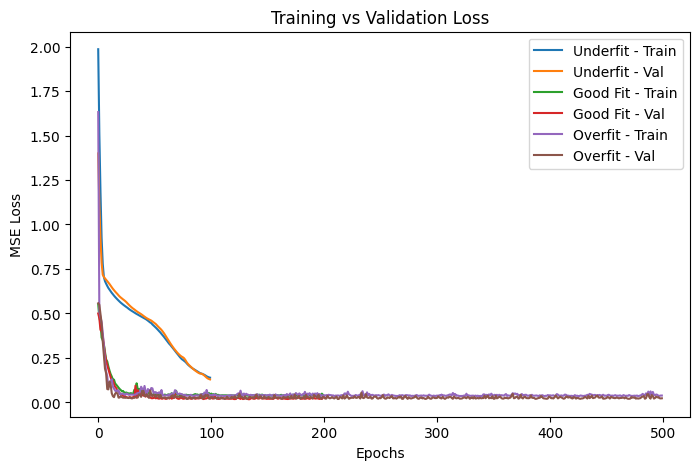

In [9]:
import matplotlib.pyplot as plt

# Plot Training vs Validation Loss
plt.figure(figsize=(8,5))

plt.plot(history_under.history['loss'], label='Underfit - Train')
plt.plot(history_under.history['val_loss'], label='Underfit - Val')

plt.plot(history_good.history['loss'], label='Good Fit - Train')
plt.plot(history_good.history['val_loss'], label='Good Fit - Val')

plt.plot(history_over.history['loss'], label='Overfit - Train')
plt.plot(history_over.history['val_loss'], label='Overfit - Val')

plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

Here’s a **short explanation** for this training vs validation loss plot code:

- **Purpose**: Compare **training loss** and **validation loss** for the three networks (underfit, good fit, overfit).
- **Plot details**:
    - **X-axis** → Epochs (training iterations)
    - **Y-axis** → Mean Squared Error (MSE)
    - **Lines**:
        - `history_under` → underfitting network
        - `history_good` → appropriate fit network
        - `history_over` → overfitting network
    - For each network, both **training loss** and **validation loss** are plotted.
- **Interpretation**:
    - **Underfitting** → both training & validation loss are high, model too simple.
    - **Good Fit** → training & validation loss are low and close together, model generalizes well.
    - **Overfitting** → training loss is very low but validation loss is high, model memorizes training data (high variance).

This plot **quantifies the bias-variance tradeoff**: visually shows underfitting, good fit, and overfitting in terms of error over epochs.

## 📘 Understanding Bias and Variance

### 🔹 Bias

**Definition**: Bias refers to the error introduced by overly simplistic assumptions in the learning algorithm.

- **High Bias**: Occurs when a model is too simple, such as using a linear model for data that has a nonlinear relationship. This leads to underfitting, where the model fails to capture important patterns in the data.
- **Example**: Applying linear regression to predict outcomes that have a quadratic relationship with the input features.
- **Effect:** Training and test error are both high.

### 🔹 Variance

**Definition**: Variance refers to the error introduced by the model's sensitivity to small fluctuations in the training data.

- **High Variance**: Occurs when a model is too complex, capturing noise and fluctuations in the training data. This leads to overfitting, where the model performs well on training data but poorly on unseen data (model memorizes noise instead of learning true patterns.).
- **Example**: Using a high-degree polynomial regression to fit data that doesn't require such complexity.
- **Effect:** Training error is low, but test error is high.

### Irreducible Error

- No model can perfectly predict outcomes due to inherent noise in the data.
- Bias + Variance are **reducible**, while irreducible error sets the floor for achievable error.
  
---

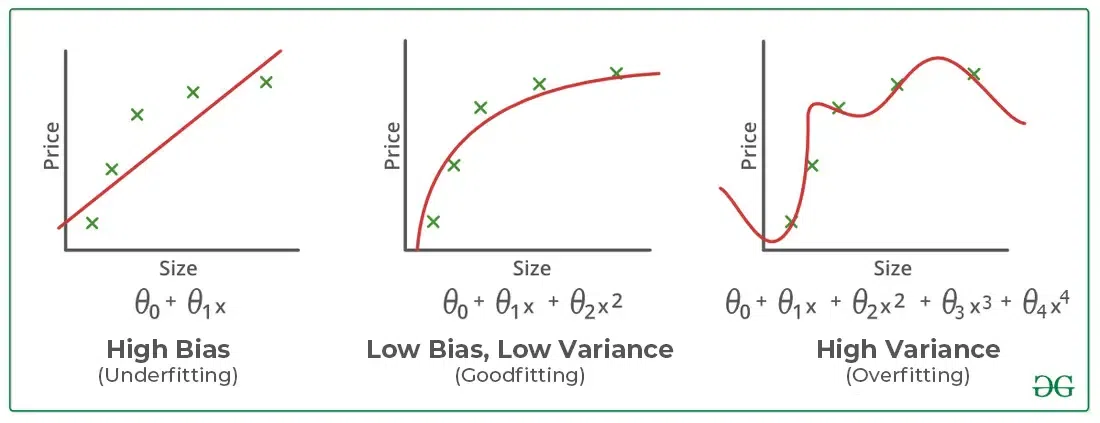

## ⚖️ The Bias-Variance Tradeoff

The bias-variance tradeoff is the balance between two sources of error that affect the performance of machine learning models:

- **High Bias, Low Variance**: Models are consistent but inaccurate.
- **Low Bias, High Variance**: Models are accurate on training data but inconsistent on unseen data.

The goal is to find a model that balances bias and variance to minimize total error.

---

## 🔄 Underfitting vs. Overfitting

- **Underfitting**: Occurs when the model is too simple, leading to high bias and poor performance on both training and test data.
- **Overfitting**: Occurs when the model is too complex, leading to high variance and excellent performance on training data but poor generalization to new data.

The optimal model complexity lies between these extremes, where both bias and variance are minimized.

---

## 🛠 Techniques to Manage the Tradeoff

### 🔹 **Model Selection**

- Start with simpler models and gradually increase complexity.
- Choose models that are complex enough to capture patterns but not so complex that they overfit.

### 🔹 Regularization

Regularization techniques add a penalty to the model's complexity to prevent overfitting:

- **L2 Regularization (Ridge Regression)**: Adds a penalty proportional to the square of the coefficients, discouraging large weights and reducing variance.
- **L1 Regularization (Lasso Regression)**: Adds a penalty proportional to the absolute value of the coefficients, leading to sparse models and feature selection.
- Dropout and weight decay are common regularization methods in deep learning.

These techniques increase bias slightly but significantly reduce variance, leading to better generalization.

### 🔹  Data Augmentation / More Data

- More data helps reduce **variance** because the model can learn general patterns instead of memorizing noise.
- Techniques:
    - Adding synthetic samples
    - Rotations, flips, or noise injection for images
    - Resampling for tabular data

### 🔹 Cross-Validation

Cross-validation involves partitioning the data into multiple subsets and training the model on different combinations of these subsets. This helps in assessing the model's performance and variability, providing a better estimate of its generalization ability.

- Use **k-fold cross-validation** to estimate generalization error.
- Helps detect overfitting and ensures your model performs consistently on unseen data.

### 🔹 Ensemble Methods

Ensemble methods combine multiple models to improve performance:

- **Bagging (Bootstrap Aggregating)**: Trains multiple models on different subsets of the data and averages their predictions, reducing variance.
- **Boosting**: Sequentially trains models, each focusing on the errors of the previous one, reducing bias.
- **Stacking** → combines strengths of different models.

These methods balance bias and variance by leveraging the strengths of multiple models.

### 🔹  Hyperparameter Tuning

- Adjust hyperparameters (number of layers, neurons, polynomial degree, regularization strength) to find the optimal balance.
- Tools: Grid Search, Random Search, Bayesian Optimization.
  
---

## 📊 Visualizing the Tradeoff

Understanding the bias-variance tradeoff is crucial for model selection and tuning. By balancing bias and variance, we can develop models that generalize well to new, unseen data.

Graphically, the total error (expected prediction error) is:

$Total Error = Bias^2 + Variance + Irreducible Error$

- As model complexity increases:
    - **Bias decreases** (better fit to training data)
    - **Variance increases** (model becomes sensitive to noise)
- **Optimal complexity** occurs where total error is minimized (sweet spot between bias and variance).

---

## 🧠 Advanced Considerations

In modern machine learning, especially with deep learning models, the traditional bias-variance tradeoff framework is evolving. Techniques like dropout, batch normalization, and data augmentation help manage overfitting in complex models. Additionally, understanding the model's capacity and the amount of data available is crucial in determining the appropriate complexity.

---
## 📝 Practical Guidelines

| Scenario | Problem | Solution |
| --- | --- | --- |
| High Bias | Underfitting | Use a more complex model, add features, reduce regularization |
| High Variance | Overfitting | Use simpler model, add regularization, increase training data |
| Optimal | Sweet spot | Balance model complexity with regularization and data |

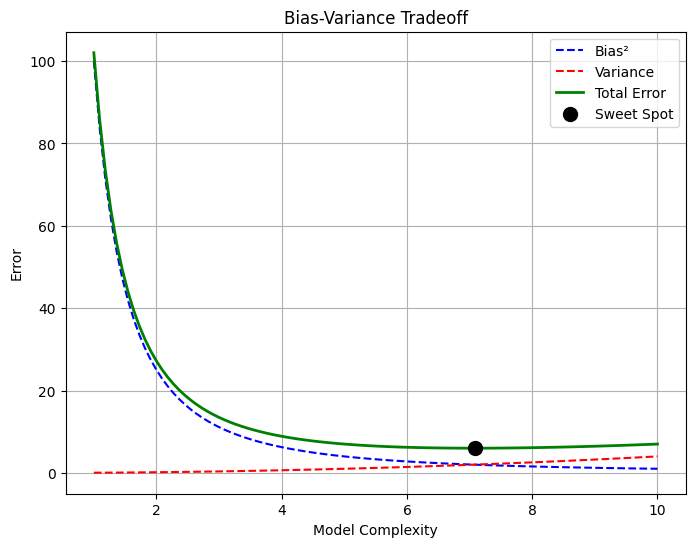

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate model complexity (e.g., polynomial degree, layers)
complexity = np.linspace(1, 10, 100)

# Bias^2 decreases with complexity
bias_squared = (10 / complexity)**2

# Variance increases with complexity
variance = (complexity / 5)**2

# Irreducible error (constant)
irreducible_error = 2

# Total error
total_error = bias_squared + variance + irreducible_error

# Plotting
plt.figure(figsize=(8,6))
plt.plot(complexity, bias_squared, label='Bias²', color='blue', linestyle='--')
plt.plot(complexity, variance, label='Variance', color='red', linestyle='--')
plt.plot(complexity, total_error, label='Total Error', color='green', linewidth=2)

# Highlight the sweet spot (minimal total error)
min_idx = np.argmin(total_error)
plt.scatter(complexity[min_idx], total_error[min_idx], color='black', s=100, zorder=5, label='Sweet Spot')

plt.title('Bias-Variance Tradeoff')
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

### ✅ Explanation:

- **`complexity`** → simulates model complexity (x-axis).
- **`bias_squared`** → decreases as complexity increases (simple models → high bias).
- **`variance`** → increases as complexity increases (complex models → high variance).
- **`irreducible_error`** → constant noise in data.
- **`total_error`** → sum of bias² + variance + irreducible error (green line).
- **Sweet spot** → point where total error is minimal (black dot).
- **Plot** shows how bias decreases, variance increases, and total error is minimized at the optimal model complexity.


- **Bias²** (blue dashed line) decreases as model becomes more complex.
- **Variance** (red dashed line) increases with complexity.
- **Total Error** (green line) is the sum of bias², variance, and irreducible error.
- **Sweet Spot** (black dot) represents the model complexity that minimizes total error — this is where bias and variance are optimally balanced.
  
It visualizes the bias-variance tradeoff and the balance needed for good generalization.

## 🎯 Regularization techniques

## L1 vs L2 (weight decay)

L1 and L2 regularization are fundamental techniques in machine learning and deep learning, designed to prevent overfitting by penalizing large model coefficients. They achieve this by adding a penalty term to the loss function, thereby discouraging the model from fitting the noise in the training data.

---

## 📌 What Are L1 and L2 Regularization?

- **L1 Regularization (Lasso Regression)**: Adds the absolute sum of the coefficients to the loss function. This penalty term is controlled by a hyperparameter λ (lambda).
    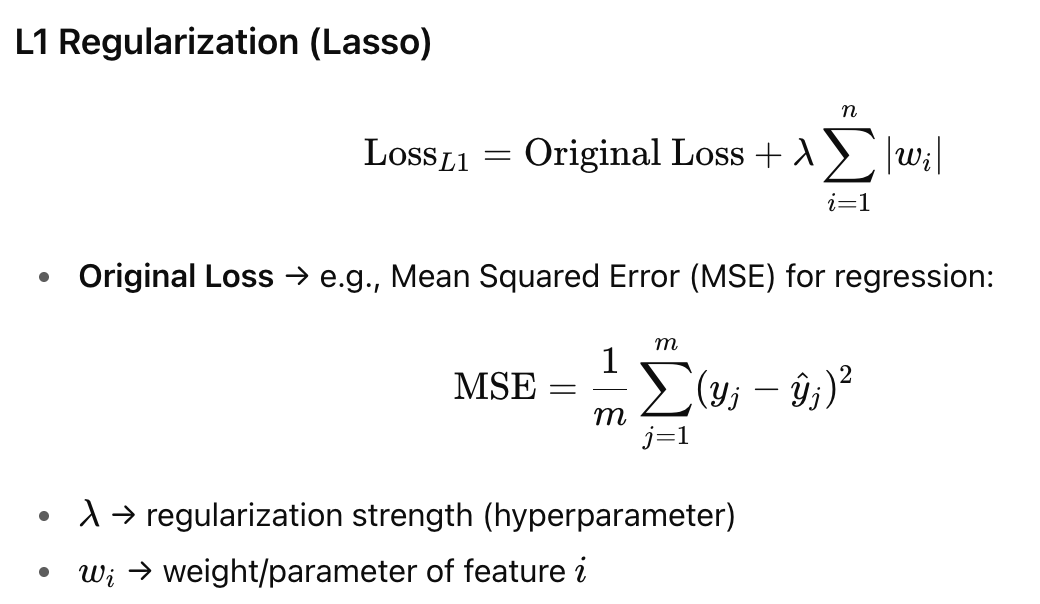
    - **Effect**: Encourages sparsity in the model by driving some coefficients to exactly zero, effectively performing feature selection.
    - Encourages sparse weights → some coefficients become exactly 0 → feature selection.
- **L2 Regularization (Ridge Regression)**: Adds the squared sum of the coefficients to the loss function. Like L1, the strength of the penalty is controlled by λ.
    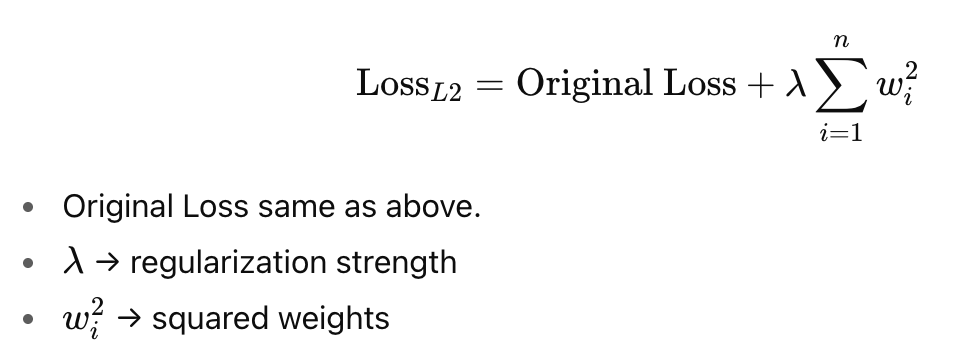
    - **Effect**: Reduces the magnitude of coefficients but does not set them to zero, leading to smaller, more evenly distributed weights.
    - Shrinks all weights proportionally → prevents overfitting but no zero weights.
  

---

## ⚖️ L1 vs. L2 Regularization: Key Differences

| Feature | L1 Regularization (Lasso) | L2 Regularization (Ridge) |
| --- | --- | --- |
| **Penalty Term** | Absolute sum of coefficients | Squared sum of coefficients |
| **Feature Selection** | Yes, by setting some coefficients to zero | No, coefficients are reduced but not eliminated |
| **Handling Multicollinearity** | Less effective, may randomly select one feature | More effective, distributes weights among correlated features |
| **Computational Complexity** | Higher due to non-differentiability at zero | Lower, as the penalty term is differentiable |
| **Use Case** | High-dimensional data with many irrelevant features | Data with multicollinearity or when all features are potentially useful |

---

## 🧠 When to Use L1 vs. L2 Regularization

- **Use L1 Regularization**:
    - When you suspect that many features are irrelevant or redundant, as it can perform automatic feature selection.
    - In high-dimensional datasets where interpretability is crucial.
- **Use L2 Regularization**:
    - When you have multicollinearity among features, as it can distribute the effect among them.
    - When all features are believed to contribute to the output, and you want to prevent any single feature from dominating.
- **Use Both (Elastic Net Regularization)**:
    - Combines L1 and L2 penalties to leverage the benefits of both. It is particularly useful when there are multiple features correlated with each other.
      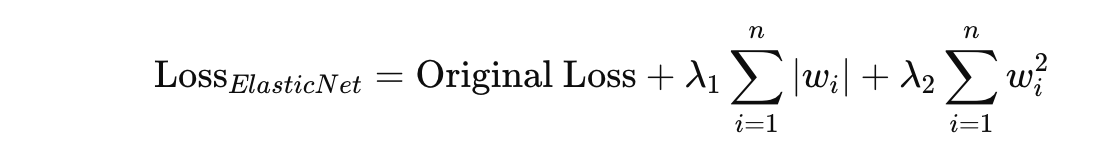
    - Combines **sparsity** (L1) and **weight shrinkage** (L2).
    - Use when features are correlated and some are irrelevant.
---

### **When Training Model**

- During training, gradient descent updates weights to **minimize Loss + Regularization**:

**Weight Update:**

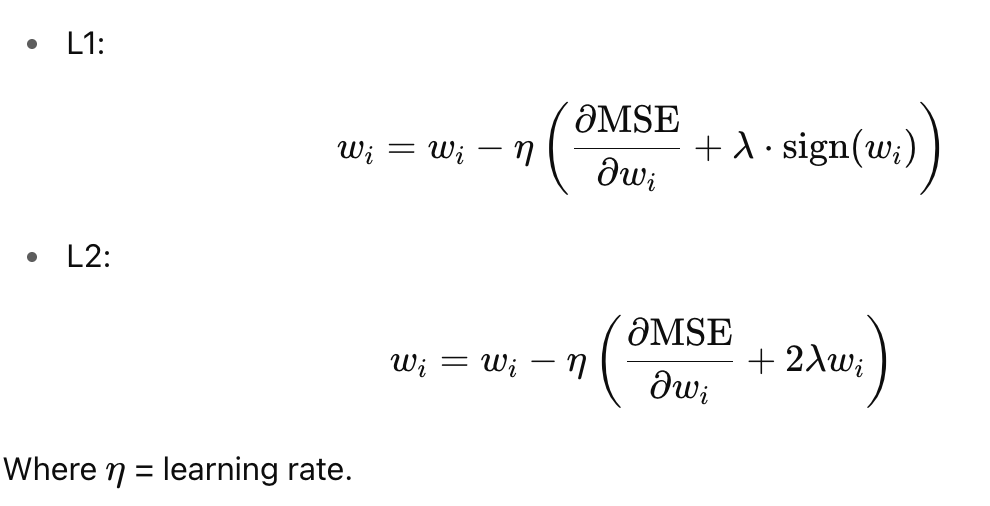

**Effect:**

- L1 → some weights shrink to **0**
- L2 → all weights shrink smoothly

Tradeoff:

- High λ (Regularisation strength) → more regularisation → higher bias, lower variance
- Low λ → less regularisation → lower bias, higher variance
  
## 📊 Visualizing the Effects

Understanding the impact of L1 and L2 regularization can be enhanced through visualization. For instance, plotting the coefficients of a linear regression model with and without regularization can illustrate how L1 regularization leads to sparse solutions (some coefficients become zero), while L2 regularization results in smaller, more evenly distributed coefficients.

---

### **For Prediction / Interpretation**

- L1 → sparse, interpretable model
- L2 → robust, generalizes better
- Elastic Net → combination of both

---

## **3️⃣ Key Considerations**

- **Always scale features**.
- **Choose L1** for feature selection and sparsity.
- **Choose L2** for stability and correlated features.
- **Use Elastic Net** if you want both sparsity and stability.
- Regularization helps **prevent overfitting** and **improve generalization**.
  
## ✅ Best Practices

- **Feature Scaling**: Always standardize or normalize your features before applying regularization, as L1 and L2 penalties are sensitive to the scale of the features.
- **Hyperparameter Tuning**: Use cross-validation to select the optimal value of λ, as the appropriate strength of regularization can vary depending on the dataset.
- **Model Selection**: Consider the nature of your data and the problem at hand when choosing between L1, L2, or Elastic Net regularization.

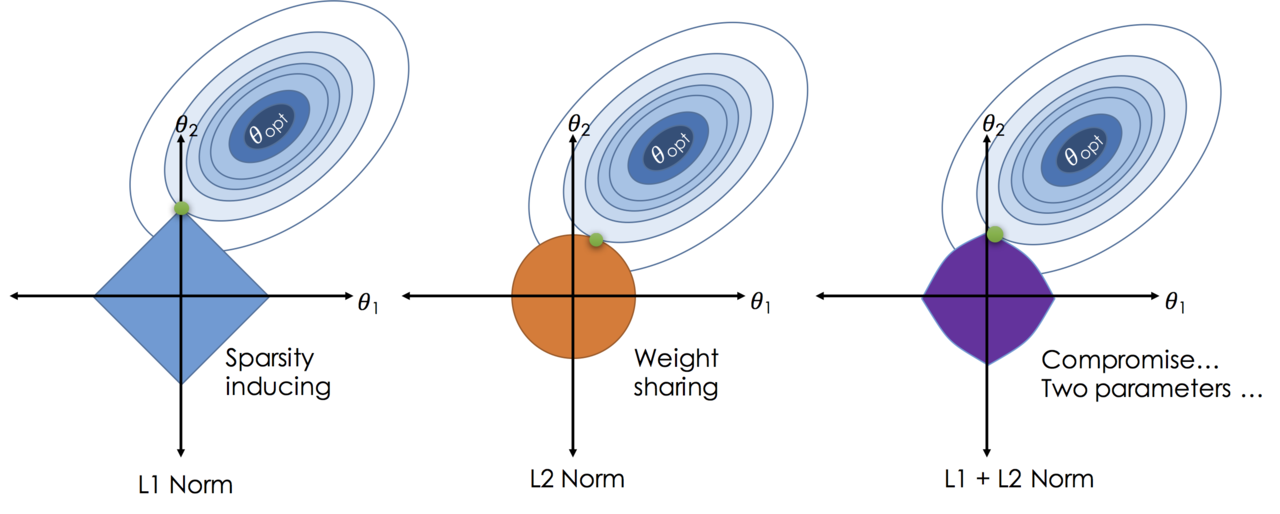
---

/opt/anaconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training No Regularization...
Training L1 Regularization...
Training L2 Regularization...
Training Elastic Net...


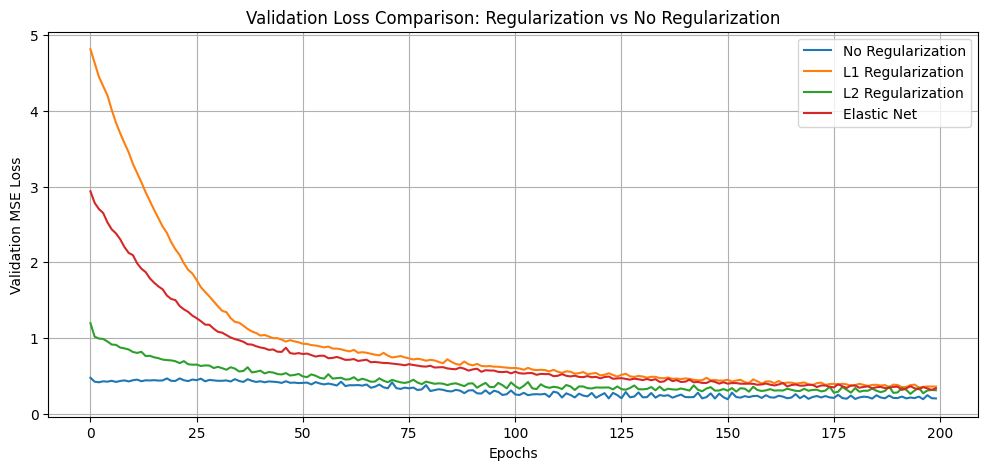

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


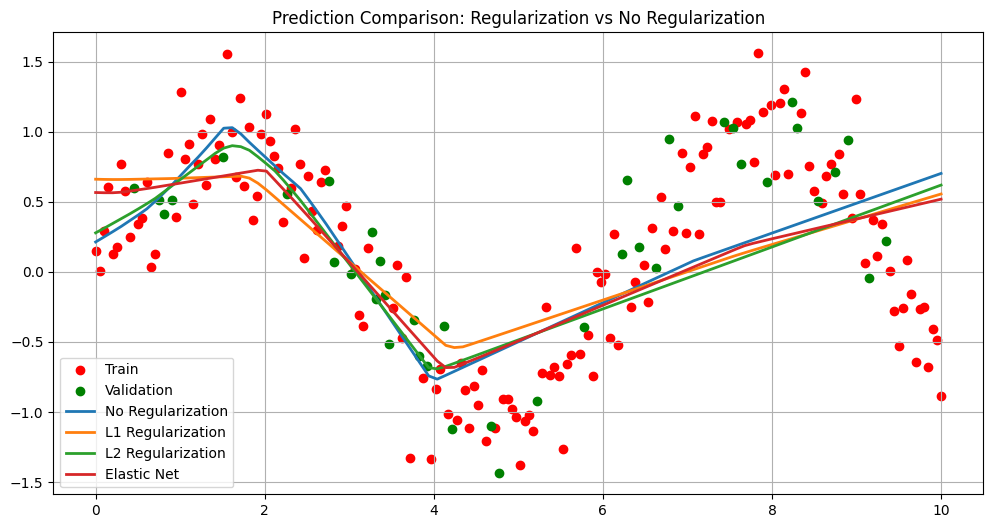

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

# 🎯 Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 10, 200).reshape(-1,1)
y = np.sin(X).ravel() + np.random.randn(200)*0.3

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Helper function to build model
def build_model(reg=None):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(1,), kernel_regularizer=reg),
        Dense(64, activation='relu', kernel_regularizer=reg),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# 🔹 Models
models = {
    "No Regularization": build_model(),
    "L1 Regularization": build_model(regularizers.l1(0.01)),
    "L2 Regularization": build_model(regularizers.l2(0.01)),
    "Elastic Net": build_model(regularizers.l1_l2(l1=0.005, l2=0.005))
}

# Train models
histories = {}
for name, model in models.items():
    print(f"Training {name}...")
    histories[name] = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                                epochs=200, verbose=0)

# ----------------------------
# Plot Validation Loss Comparison
# ----------------------------
plt.figure(figsize=(12,5))
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=name)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE Loss')
plt.title('Validation Loss Comparison: Regularization vs No Regularization')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Plot Predictions Comparison
# ----------------------------
X_test = np.linspace(0,10,100).reshape(-1,1)
plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train, color='red', label='Train')
plt.scatter(X_val, y_val, color='green', label='Validation')
for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.plot(X_test, y_pred, label=name, linewidth=2)
plt.title('Prediction Comparison: Regularization vs No Regularization')
plt.legend()
plt.grid(True)
plt.show()

### **Explanation**

**Validation Loss Plot**

- Helps see which model **generalizes better**.
- No Regularization might have **lower training loss but higher validation loss** → overfitting.
- Regularized models usually have **higher training loss but lower/stable validation loss** → better generalization.

  
1. **No Regularization** → model can overfit noisy data.
2. **L1 Regularization** → adds **sum of absolute weights** to loss → can zero out unnecessary neurons/features.
3. **L2 Regularization** → adds **sum of squared weights** to loss → shrinks weights, prevents very large values.
4. **Elastic Net** → combination of **L1 + L2** → sparse and stable weights.
- `kernel_regularizer=regularizers.l1()`, `l2()`, or `l1_l2()` is how you add regularization in Keras Dense layers.
- Validation loss plots show **generalization**; predictions show how smooth or overfitted the model is.

## Dropout (randomly dropping neurons)

## 🧠 What Is Dropout?

**Dropout** is a regularization technique introduced by Geoffrey Hinton and his colleagues in 2014 to prevent overfitting in deep neural networks. It involves randomly setting a fraction of input and recurrent units to zero at each update during training time. This prevents neurons from co-adapting too much, thus improving the model's ability to generalize.

---

## 🔍 How Dropout Works

During training, dropout randomly disables a fraction of neurons in the network. For instance, with a dropout rate of 0.5, half of the neurons are randomly set to zero during each forward and backward pass. This forces the network to learn redundant representations, making it more robust and less likely to overfit.

At test time, dropout is turned off, and the full network is used, but the weights are scaled down by the dropout rate to account for the reduced number of active neurons during training.

---

## 📊 Dropout in Practice

To visualize how dropout affects a neural network, consider the following diagram:

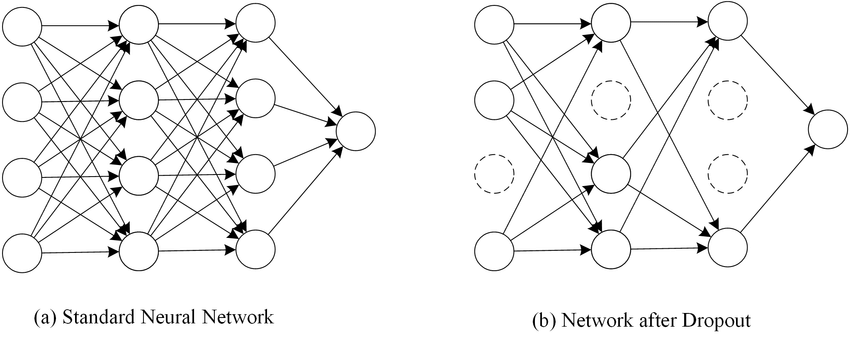

In this diagram:

- The circles represent neurons.
- The lines represent connections between neurons.
- The neurons with a line through them are "dropped out" and do not participate in the forward or backward pass during that training iteration.

This illustrates how dropout introduces stochasticity into the training process, forcing the network to learn more robust features.

---

## **Mechanism & How It Works**

---

## **1️⃣ The Core Idea**


- During **each forward pass**, some neurons are randomly set to **0** with probability ppp (called the dropout rate).
- This forces the network to **not rely too much on any single neuron**, encouraging redundant and robust feature representations.
- At **test time**, dropout is **turned off**, and the full network is used. To compensate for the missing neurons during training, the remaining weights are **scaled by the dropout rate**.

---

## **2️⃣ Forward Pass Mechanism**

Let’s say you have a layer with activations a=[a1,a2,a3,a4] and a dropout rate p=0.5.

1. **Generate a dropout mask** m with the same shape as the activations:
    
    Each element is 0 with probability p or 1 with probability 1−p.

m=[1,0,1,0] (randomly generated)

2. **Apply the mask to the activations**:

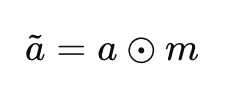

Where ⊙ is element-wise multiplication.

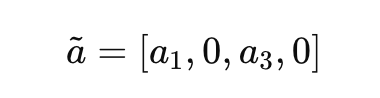

3. **Scale activations** during training (optional, sometimes done at test time):
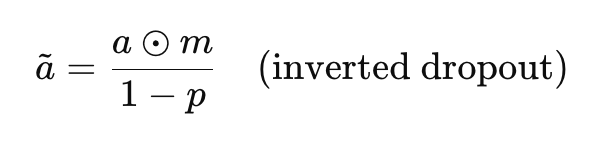

- Ensures the **expected sum of activations** remains the same during training and testing.

---

## **3️⃣ Backpropagation with Dropout**

- During **backpropagation**, the same mask is applied to the gradients:
    - Only neurons that were **active in the forward pass** receive gradient updates.
    - Dropped neurons receive **zero gradients**.
- This means each update is based on a **random subset of the network**, which acts like training multiple "thinned" networks simultaneously.

---

## **4️⃣ Why Dropout Works (Intuition)**

1. **Prevents co-adaptation**:
    - Neurons cannot rely on specific other neurons because they might be dropped.
    - Forces neurons to learn **robust and independent features**.
2. **Acts like ensemble learning**:
    - Each forward pass is like a **different subnetwork**.
    - At test time, all subnetworks are combined, which improves generalization.
3. **Reduces overfitting**:
    - Since neurons are randomly dropped, the model cannot memorize the training data.
    - The network is forced to generalize better to unseen data.

---

### **During Training**

- **What happens:**
    - Each neuron in a layer is **kept active with probability 1−p1-p1−p**, or **dropped (set to 0) with probability ppp**.
    - Here, ppp is the dropout rate.
    - This is done **independently for every training batch**.
- **Effect:**
    - The network sees **different “thinned” versions** of itself each time.
    - Neurons cannot rely on other neurons being always present → prevents co-adaptation.
      
## **5️⃣ Mathematical Formulation**
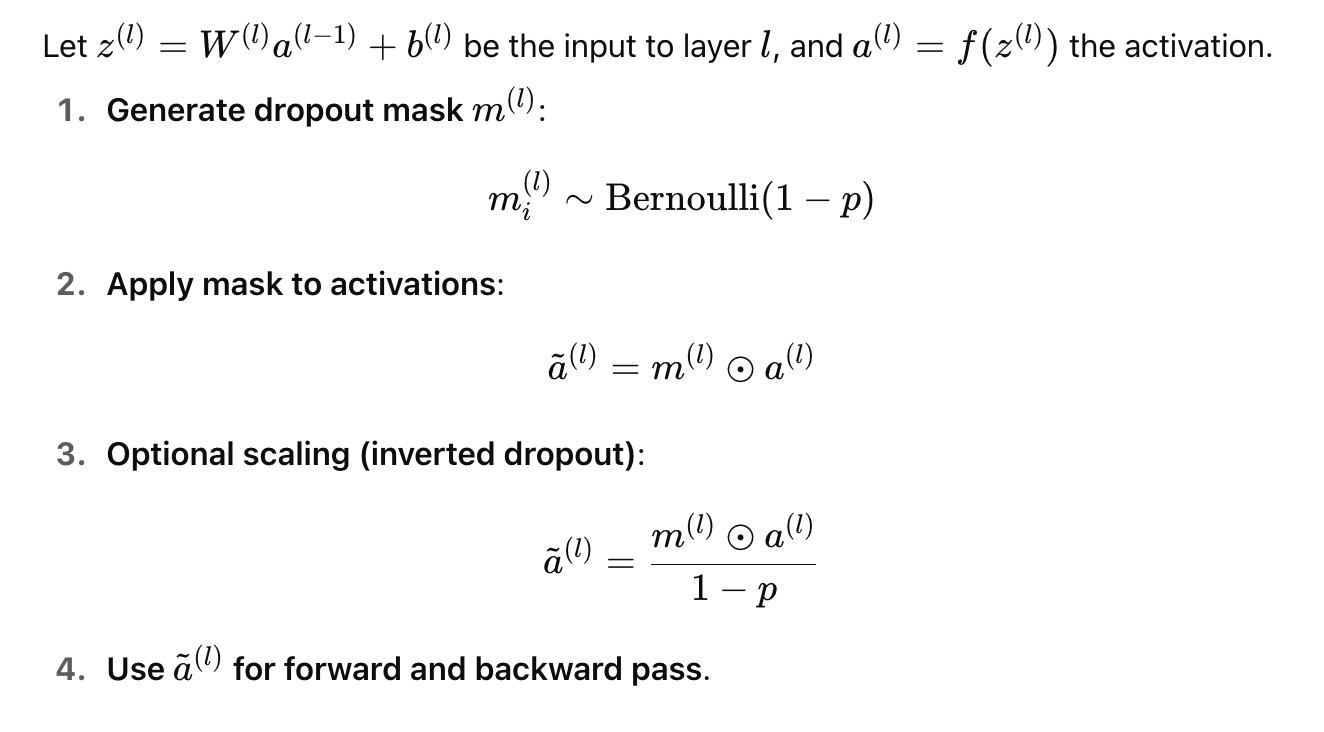
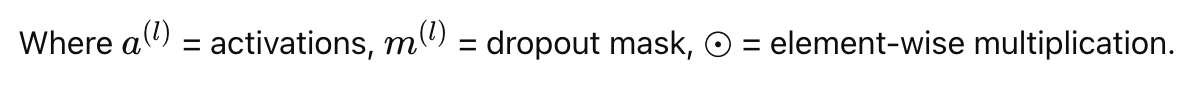

---

## **6️⃣ Dropout in Layers**

- Can be applied to:
    - **Fully connected (Dense) layers** → most common
    - **Convolutional layers** → applied after flattening or via spatial dropout
    - **Recurrent layers** → use specialized dropout like **variational dropout**
- Typical dropout rates:
    - Dense layers → 0.2 to 0.5
    - Input layers → lower rate (0.1–0.2)

---

## **7️⃣ Test Time Adjustment**

### **During Inference (Testing)**

- **Problem:**
    - At test time, we **use the full network** (no neurons are dropped).
    - But during training, each neuron was **active only (1-p) fraction of the time**.
    - If we directly use all neurons at full strength, the outputs will be **larger than expected**.
- **Solution:** **Scale the activations (if not using inverted dropout)**.
    - Multiply the activations by the probability of being kept: 1−p.
    - This ensures that the **expected output of each neuron during training equals its output during inference**.

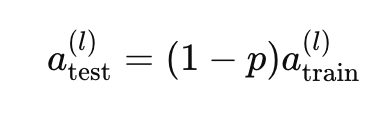

- Ensures **consistency between training and testing activations**.

- **Alternative (inverted dropout):**

- During training, instead of scaling at test time, we scale **the active neurons during training** by $1/(1−p)$.
- Then, at test time, we just use the full network **without scaling**.

### **Intuition**

- Think of each neuron as contributing **part of its usual value** during training because it’s only active some of the time.
- During testing, all neurons are active, so we **adjust their contribution** so the network behaves like the **average of all subnetworks** seen during training.

---

### **8️⃣ Summary of Mechanism**

| Step | Action |
| --- | --- |
| 1 | Generate random mask m∼Bernoulli(1−p) |
| 2 | Apply mask to activations: $a^~=a⊙m$ |
| 3 | Scale activations (optional): $a^~/(1−p)$ |
| 4 | Forward pass with $a^~$ |
| 5 | Backpropagate only through active neurons |
| 6 | At test time, use all neurons and adjust weights if needed |

## ✅ Advantages of Dropout

- **Prevents Overfitting**: By randomly disabling neurons, dropout reduces the risk of overfitting, especially in large networks with many parameters.
- **Improves Generalization**: The technique encourages the network to learn more general features that are useful across different subsets of the data.
- **Acts as Ensemble Learning**: Dropout can be seen as training a large number of "thinned" networks, each with a different subset of neurons, and averaging their predictions.

---

## ⚠️ Limitations and Considerations

- **Increased Training Time**: Since dropout introduces randomness, it may require more epochs to converge.
- **Not Always Beneficial**: In some cases, especially with small datasets or simple models, dropout might not provide significant improvements and could even degrade performance.
- **Requires Tuning**: The dropout rate (typically between 0.2 and 0.5) is a hyperparameter that needs to be tuned based on the specific problem and dataset.

---

## 🔄 Variants and Alternatives

- **Variational Dropout**: A probabilistic interpretation of dropout that treats it as a variational approximation to a Gaussian process prior.
- **Monte Carlo Dropout**: Used during inference to estimate uncertainty by applying dropout at test time.
- **DropConnect**: A similar technique where instead of dropping out activations, the weights themselves are randomly set to zero.

---

## ✅ **Key Takeaways**

- Dropout is **stochastic regularization**, not deterministic.
- It **prevents overfitting** by reducing neuron co-adaptation.
- Acts like **training multiple subnetworks** simultaneously.
- Works for **dense, convolutional, and recurrent layers**, with some adjustments.
- Dropout rate ppp is a **tunable hyperparameter**.

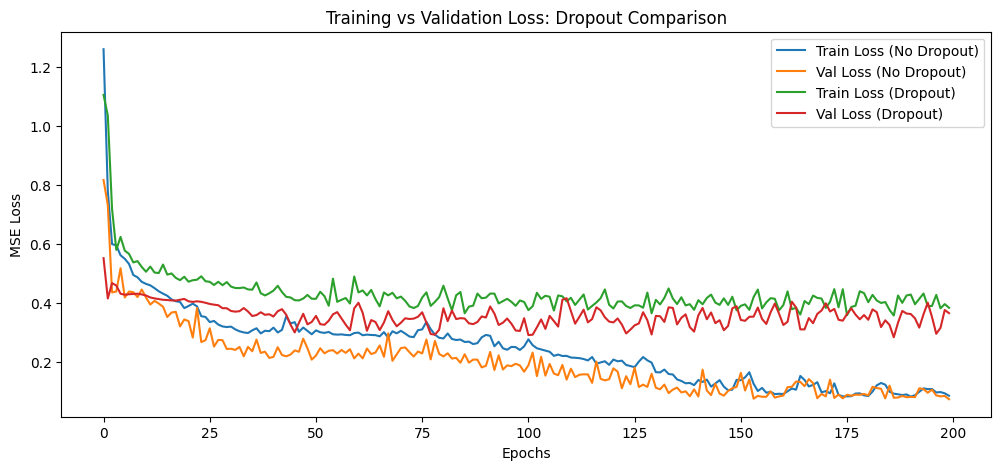

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


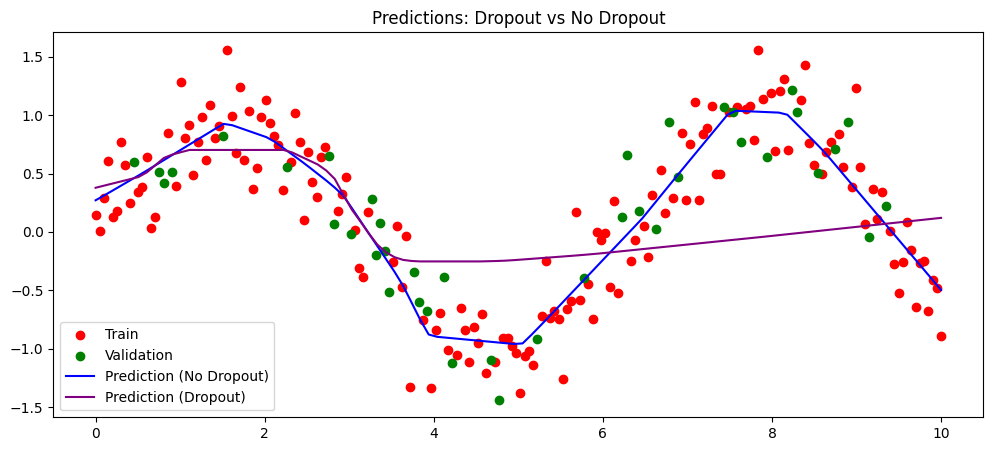

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# 🎯 Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 10, 200).reshape(-1,1)
y = np.sin(X).ravel() + np.random.randn(200)*0.3  # sine wave + noise

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Model WITHOUT Dropout
model_no_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model_no_dropout.compile(optimizer=Adam(0.01), loss='mse')
history_no_dropout = model_no_dropout.fit(X_train, y_train, validation_data=(X_val, y_val),
                                          epochs=200, verbose=0)

# 🔹 Model WITH Dropout
model_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])
model_dropout.compile(optimizer=Adam(0.01), loss='mse')
history_dropout = model_dropout.fit(X_train, y_train, validation_data=(X_val, y_val),
                                    epochs=200, verbose=0)

# Plot training vs validation loss
plt.figure(figsize=(12,5))
plt.plot(history_no_dropout.history['loss'], label='Train Loss (No Dropout)')
plt.plot(history_no_dropout.history['val_loss'], label='Val Loss (No Dropout)')
plt.plot(history_dropout.history['loss'], label='Train Loss (Dropout)')
plt.plot(history_dropout.history['val_loss'], label='Val Loss (Dropout)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss: Dropout Comparison')
plt.legend()
plt.show()

# Plot predictions
X_test = np.linspace(0, 10, 100).reshape(-1,1)
y_pred_no_dropout = model_no_dropout.predict(X_test)
y_pred_dropout = model_dropout.predict(X_test)

plt.figure(figsize=(12,5))
plt.scatter(X_train, y_train, color='red', label='Train')
plt.scatter(X_val, y_val, color='green', label='Validation')
plt.plot(X_test, y_pred_no_dropout, color='blue', label='Prediction (No Dropout)')
plt.plot(X_test, y_pred_dropout, color='purple', label='Prediction (Dropout)')
plt.title('Predictions: Dropout vs No Dropout')
plt.legend()
plt.show()

## **Explanation**

### **Training vs Validation Loss**

- **Without dropout**:
    - Training loss drops very low.
    - Validation loss may **increase after some epochs** → overfitting.
- **With dropout**:
    - Training loss decreases more slowly.
    - Validation loss stays **closer to training loss** → better generalization.

---

### **Predictions**

- **No Dropout**:
    - The model tries to **fit noise** → curve fluctuates too much.
- **With Dropout**:
    - The model **captures the true sine wave trend**.
    - Dropout prevents neurons from over-relying on each other → smoother predictions.

---

### ✅ **Key Takeaways**

1. Dropout **slows training slightly** but improves generalization.
2. Helps the network **avoid memorizing noise** in the training set.
3. Visually, predictions with dropout are **less wiggly and more robust**.

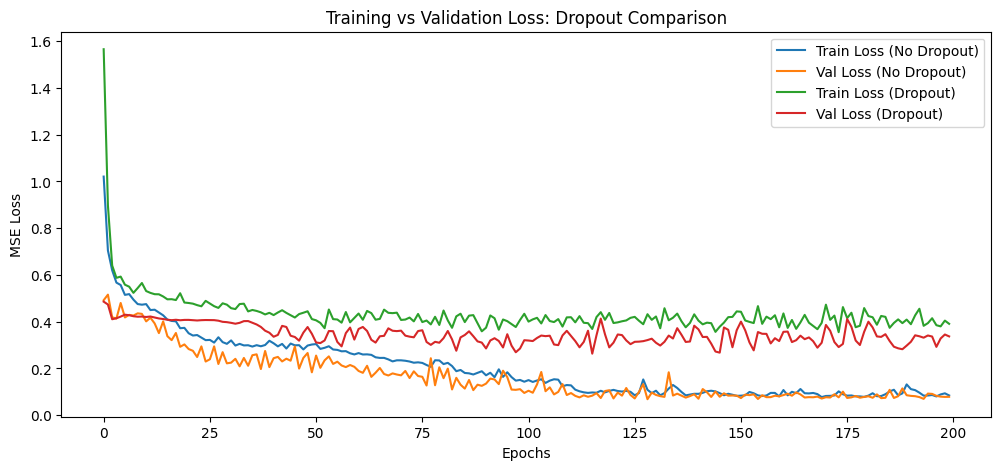

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


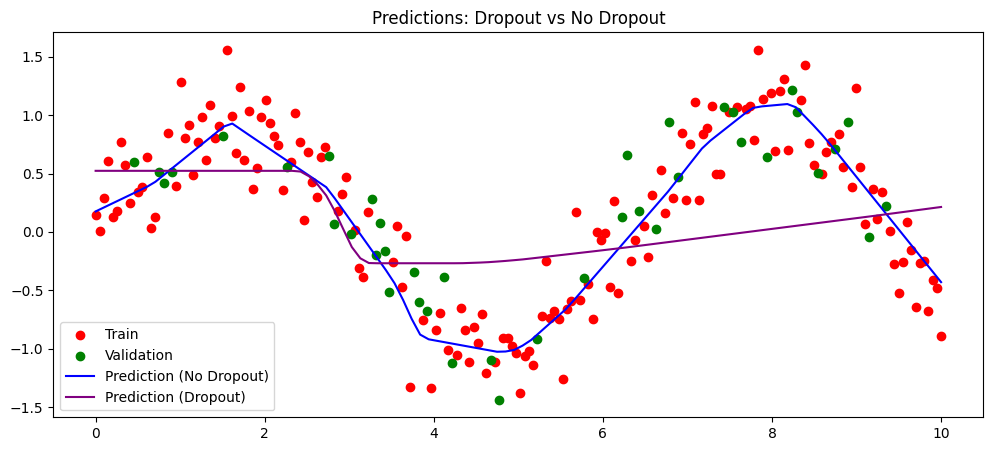

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# 🎯 Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 10, 200).reshape(-1,1)
y = np.sin(X).ravel() + np.random.randn(200)*0.3  # sine wave + noise

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Model WITHOUT Dropout
model_no_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model_no_dropout.compile(optimizer=Adam(0.01), loss='mse')
history_no_dropout = model_no_dropout.fit(X_train, y_train, validation_data=(X_val, y_val),
                                          epochs=200, verbose=0)

# 🔹 Model WITH Dropout
model_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])
model_dropout.compile(optimizer=Adam(0.01), loss='mse')
history_dropout = model_dropout.fit(X_train, y_train, validation_data=(X_val, y_val),
                                    epochs=200, verbose=0)

# Plot training vs validation loss
plt.figure(figsize=(12,5))
plt.plot(history_no_dropout.history['loss'], label='Train Loss (No Dropout)')
plt.plot(history_no_dropout.history['val_loss'], label='Val Loss (No Dropout)')
plt.plot(history_dropout.history['loss'], label='Train Loss (Dropout)')
plt.plot(history_dropout.history['val_loss'], label='Val Loss (Dropout)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss: Dropout Comparison')
plt.legend()
plt.show()

# Plot predictions
X_test = np.linspace(0, 10, 100).reshape(-1,1)
y_pred_no_dropout = model_no_dropout.predict(X_test)
y_pred_dropout = model_dropout.predict(X_test)

plt.figure(figsize=(12,5))
plt.scatter(X_train, y_train, color='red', label='Train')
plt.scatter(X_val, y_val, color='green', label='Validation')
plt.plot(X_test, y_pred_no_dropout, color='blue', label='Prediction (No Dropout)')
plt.plot(X_test, y_pred_dropout, color='purple', label='Prediction (Dropout)')
plt.title('Predictions: Dropout vs No Dropout')
plt.legend()
plt.show()


## **Explanation**

### **Training vs Validation Loss**

- **Without dropout**:
    - Training loss drops very low.
    - Validation loss may **increase after some epochs** → overfitting.
- **With dropout**:
    - Training loss decreases more slowly.
    - Validation loss stays **closer to training loss** → better generalization.

---

### **Predictions**

- **No Dropout**:
    - The model tries to **fit noise** → curve fluctuates too much.
- **With Dropout**:
    - The model **captures the true sine wave trend**.
    - Dropout prevents neurons from over-relying on each other → smoother predictions.

---

### ✅ **Key Takeaways**

1. Dropout **slows training slightly** but improves generalization.
2. Helps the network **avoid memorizing noise** in the training set.
3. Visually, predictions with dropout are **less wiggly and more robust**.

---

# **📘 Data Augmentation in Deep Learning**

Data augmentation is a set of techniques used to artificially **increase the size and diversity of a training dataset** by creating new, modified versions of existing data samples. It is crucial in deep learning, particularly in computer vision, because **large and varied datasets help models generalize better**, reduce overfitting, and improve performance on unseen data.

By introducing variations in the data that the model might encounter in the real world, data augmentation allows neural networks to **learn more robust features** rather than memorizing the training set.

---

## **🔄 Main Categories of Data Augmentation**

### **1. Geometric Transformations**

These transformations change the spatial properties of images, helping the model recognize objects regardless of position, orientation, or scale.

- **Flipping**
    - Horizontal flip: Mirrors the image along the vertical axis.
    - Vertical flip: Mirrors the image along the horizontal axis.
    - Useful when orientation doesn’t affect the label (e.g., flipping cats or cars horizontally).
- **Rotation**
    - Rotates the image by a certain degree.
    - Helps models recognize objects at different angles.
    - Extreme rotations can distort objects, so small/moderate angles are recommended.
- **Scaling / Zooming**
    - Zoom in or out of images to simulate objects at various distances.
    - Helps the model generalize to different object sizes.
- **Translation**
    - Shifts the image along the x or y axis.
    - Makes the model invariant to object position within the image.
- **Shearing**
    - Slants the image in a particular direction.
    - Simulates perspective changes, such as tilting or skewing.
- **Cropping / Random Crops**
    - Randomly selects a portion of the image.
    - Forces the model to focus on different parts of the object.

---

### **2. Color Space Adjustments**

These augmentations modify pixel intensity or color to simulate different lighting conditions and camera settings.

- **Brightness Adjustment**
    - Makes the image brighter or darker.
    - Helps models handle varying illumination.
- **Contrast Adjustment**
    - Alters the contrast to improve robustness against lighting variability.
- **Saturation / Hue Adjustment**
    - Changes color intensity or shifts hue to simulate different color conditions.
- **Color Jittering**
    - Randomly applies changes to brightness, contrast, saturation, and hue.
    - Introduces color diversity without changing the object’s structure.

---

### **3. Noise Injection**

Adding noise to images improves robustness by making models resistant to small perturbations.

- **Gaussian Noise**: Adds normally distributed noise to pixels.
- **Salt-and-Pepper Noise**: Randomly sets pixels to black or white.
- Helps the model perform well under real-world sensor noise or compression artifacts.

---

### **4. Random Erasing / Cutout**

- Randomly selects a rectangle within the image and sets its pixels to zero (or mean value).
- Forces the model to learn from other parts of the image instead of relying on specific features.
- Enhances generalization and robustness.

---

### **5. Advanced Data Augmentation Techniques**

Beyond simple transformations, advanced techniques generate entirely new samples.

- **Generative Adversarial Networks (GANs)**
    - GANs can create realistic new images that expand the training dataset.
    - Useful for datasets where collecting new data is expensive or limited.
- **Neural Style Transfer**
    - Transfers the style (texture, color) of one image onto another while keeping the original content.
    - Generates visually diverse images that retain label consistency.
- **Autoencoders**
    - Learn compressed representations of images.
    - Can generate new samples by decoding latent vectors.

---

## **✅ Benefits of Data Augmentation**

1. **Improved Generalization** – Reduces overfitting and helps models perform well on unseen data.
2. **Effective Dataset Expansion** – Creates more training samples without the need to collect additional data.
3. **Robustness to Variations** – Models learn to handle changes in lighting, orientation, scale, and noise.
4. **Cost-Effective** – Significantly cheaper and faster than acquiring new data.
5. **Helps with Class Imbalance** – Augment minority class samples to balance the dataset.

---

## **⚠️ Best Practices**

- **Task Relevance** – Only apply augmentations that make sense for the domain (e.g., vertical flips may not work for digit recognition).
- **Moderation** – Avoid overly aggressive transformations that produce unrealistic data.
- **Balanced Application** – Ensure augmentations are applied uniformly across classes to prevent bias.
- **Validation Monitoring** – Continuously monitor validation performance to ensure augmentations improve generalization.

---


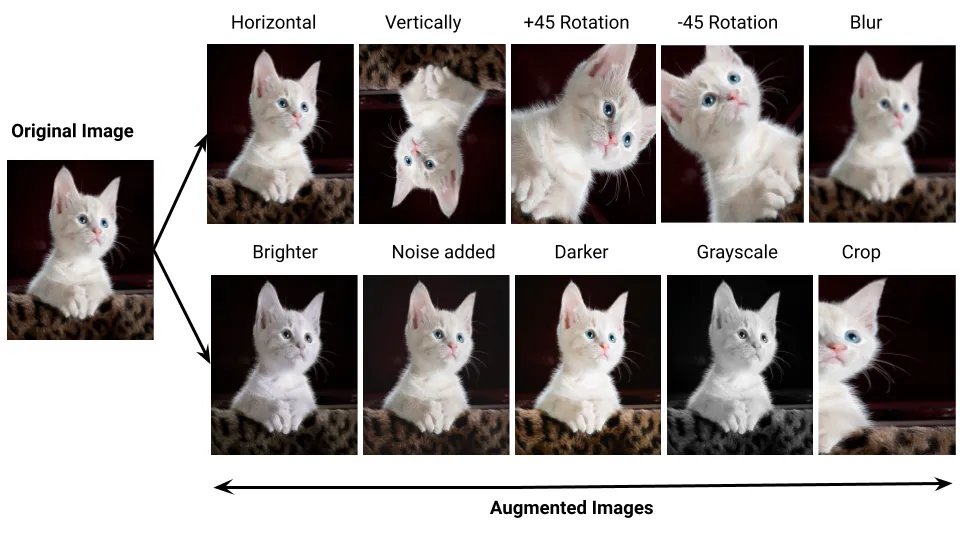

## **🧪 Mechanism: How Data Augmentation Works**

1. Start with an existing training dataset.
2. Apply transformations (geometric, color, noise, etc.) either **offline** (before training) or **on-the-fly** during training.
    ## **On-the-Fly vs Offline Augmentation**
    
    ### **Offline (Preprocessing)**
    
    - Generate augmented images **before training** and save them.
    - Pros: Model sees a **fixed augmented dataset**.
    - Cons: Requires **more storage**.
    
    ### **On-the-Fly (During Training)**
    
    - Augmentation applied **randomly at each training step**.
    - Pros: Infinite variations, no extra storage required.
    - Cons: Slightly more computational overhead during training.
    
    Most modern frameworks (TensorFlow, PyTorch) use **on-the-fly augmentation**, ensuring the model sees **different versions of each image in each epoch**.
   
4. Feed augmented images into the model as if they were new samples.
5. The model sees **different variations** of the same image in different epochs → learns **robust, generalizable features**.

**Diagrammatically**:

```
Original Image → [Rotate, Flip, Zoom, Color Jitter] → Augmented Image
Original Image → [Noise, Cutout] → Augmented Image

```

- During training, these augmented images replace or supplement the original images.
- ## **Learning Robust Features**
    Why augmentation helps:
    
    - Without augmentation: model may memorize noise or small patterns → overfitting.
    - With augmentation: model sees **many variations** → forced to learn **invariant features**.
    
    Example:
    
    - Task: detect cats
    - Original image: cat facing right
    - Augmented images: cat facing left, rotated, brighter, partially occluded
    - Model learns: "This is a cat **regardless of orientation, lighting, or partial occlusion**".
    
    ## **Validation / Test Data**
    
    - Augmentation is **not applied** to validation/test sets.
    - These sets are used to evaluate **true generalization**.
    - Validation loss will reflect whether augmentation helps the model generalize.

---

## **💡 Conclusion**

Data augmentation is **essential in deep learning**, especially for image tasks. By using a mix of geometric, color, noise-based, and advanced GAN-based augmentations:

- Models become **robust** to real-world variations.
- Overfitting is reduced.
- Generalization is improved.

Properly implemented, augmentation **dramatically improves model accuracy and reliability** without needing extra data collection.

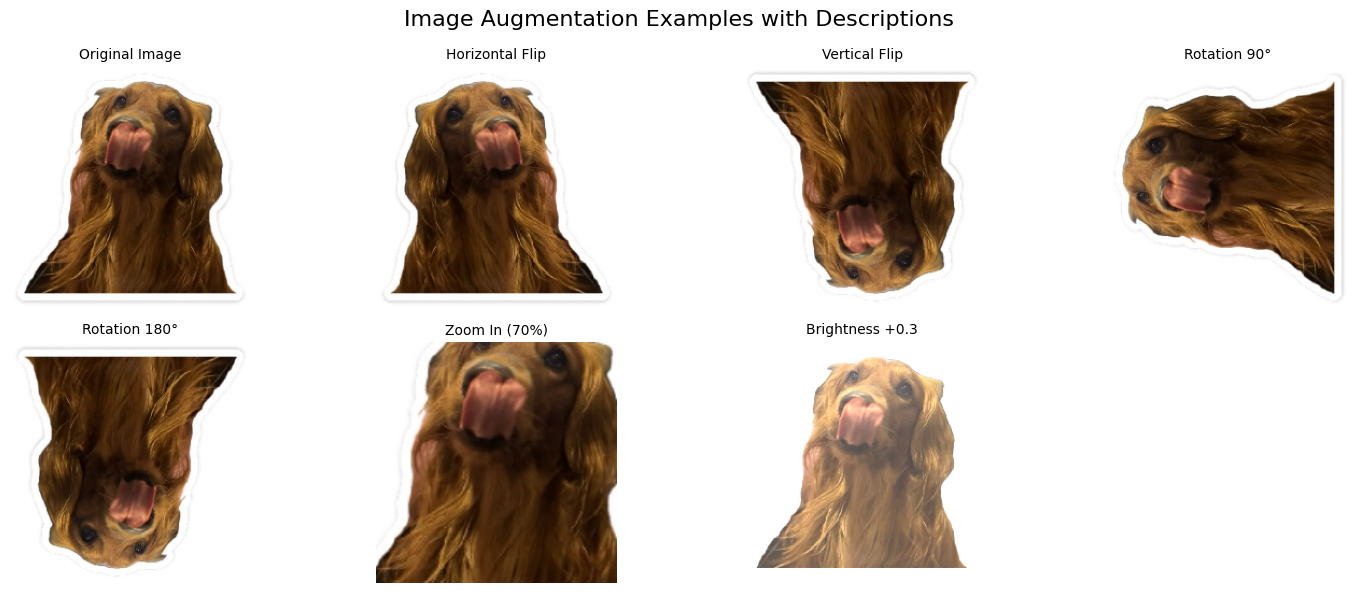

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# ---------------------------
# 1️⃣ Load your image
# ---------------------------
image_path = '/Users/natashababu/Documents/corazon.jpeg' # use your desired image
img = load_img(image_path, target_size=(224, 224))
x = img_to_array(img) / 255.0  # Normalize
x = np.expand_dims(x, axis=0)

# ---------------------------
# 2️⃣ Define augmentations manually
# ---------------------------
def apply_augmentation(img_array):
    augmented_images = []
    descriptions = []

    # Original
    augmented_images.append(img_array[0])
    descriptions.append("Original Image")

    # Horizontal Flip
    h_flip = tf.image.flip_left_right(img_array)
    augmented_images.append(h_flip[0].numpy())
    descriptions.append("Horizontal Flip")

    # Vertical Flip
    v_flip = tf.image.flip_up_down(img_array)
    augmented_images.append(v_flip[0].numpy())
    descriptions.append("Vertical Flip")

    # Rotation using tf.image.rot90 (0°, 90°, 180°, 270°)
    rot90 = tf.image.rot90(img_array, k=1)  # 90 degrees
    augmented_images.append(rot90[0].numpy())
    descriptions.append("Rotation 90°")

    rot180 = tf.image.rot90(img_array, k=2)  # 180 degrees
    augmented_images.append(rot180[0].numpy())
    descriptions.append("Rotation 180°")

    # Zoom in (crop and resize)
    zoom_in = tf.image.central_crop(img_array, central_fraction=0.7)
    zoom_in = tf.image.resize(zoom_in, [224,224])
    augmented_images.append(zoom_in[0].numpy())
    descriptions.append("Zoom In (70%)")

    # Brightness adjustment
    bright = tf.image.adjust_brightness(img_array, delta=0.3)
    augmented_images.append(bright[0].numpy())
    descriptions.append("Brightness +0.3")

    return augmented_images, descriptions

# ---------------------------
# 3️⃣ Apply augmentations
# ---------------------------
aug_images, desc = apply_augmentation(x)

# ---------------------------
# 4️⃣ Plot augmented images
# ---------------------------
plt.figure(figsize=(15,6))
for i, (image, d) in enumerate(zip(aug_images, desc)):
    plt.subplot(2, 4, i+1)
    plt.imshow(np.clip(image, 0, 1))
    plt.title(d, fontsize=10)
    plt.axis('off')

plt.suptitle("Image Augmentation Examples with Descriptions", fontsize=16)
plt.tight_layout()
plt.show()

**Short explanation** of the code:

1. **Load Image** – Reads an image from your Mac, resizes it to 224×224, normalizes pixels, and adds a batch dimension.
2. **Apply Augmentations** – Manually applies transformations like horizontal/vertical flip, rotation, zoom, and brightness change. Each augmented image has a matching description.
3. **Generate Images** – Calls the augmentation function to produce all transformed images.
4. **Plot Images** – Displays the original and augmented images in a grid with titles showing the applied transformation.

✅ **Purpose:** Visualize controlled data augmentation with exact transformation labels.

---

## **Early Stopping in Deep Learning** 🛑

### **1️⃣ What is Early Stopping?**

Early stopping is a **regularization technique** used to prevent **overfitting** in deep learning models.

- During training, a model's performance on the **training set** continuously improves.
- However, after a certain point, the model starts to **memorize the training data** rather than learning patterns, causing performance on the **validation set** to degrade.
- Early stopping **halts training before overfitting occurs**, helping the model generalize better to unseen data.

Think of it as **“knowing when to stop training”** rather than blindly running for a fixed number of epochs.

---

### **2️⃣ Why Use Early Stopping?** 🎯

- **Prevent overfitting:** Stops the model before it starts memorizing training data.
- **Save computational resources:** Avoids unnecessary training once the model has reached optimal performance.
- **Improve generalization:** Leads to a model that performs well on **validation and test sets**.
- **Simplicity:** Easy to implement using callbacks in frameworks like **Keras/TensorFlow**.

---

### **3️⃣ How Does Early Stopping Work?** 🔍

The mechanism of early stopping can be summarized in **four main steps**:

1. **Monitor a performance metric:**
    - During training, track a **validation metric** such as `val_loss` or `val_accuracy`.
    - This metric indicates how well the model generalizes.
2. **Define stopping criteria:**
    - Stop training if the monitored metric **does not improve** for a certain number of epochs (called **patience**).
    - Example: `patience=5` means training stops if validation loss does not improve for 5 consecutive epochs.
3. **Optionally restore best weights:**
    - After stopping, the model can **revert to the weights from the epoch with the best validation performance**, ensuring optimal generalization.
4. **Continue if improvement occurs:**
    - If the validation metric improves, reset the patience counter and continue training.

---

### **4️⃣ Key Parameters of Early Stopping**

| Parameter | Description | Example |
| --- | --- | --- |
| `monitor` | The metric to track, usually `val_loss` or `val_accuracy`. | `monitor='val_loss'` |
| `patience` | Number of epochs to wait before stopping after no improvement. | `patience=5` |
| `min_delta` | Minimum change in the monitored metric to qualify as an improvement. | `min_delta=0.001` |
| `restore_best_weights` | Whether to restore model weights from the epoch with the best metric. | `restore_best_weights=True` |

---

### **5️⃣ Benefits of Early Stopping** ✅

1. **Prevents overfitting:** Stops training before the model starts memorizing noise.
2. **Saves time and computation:** No need to train for a fixed high number of epochs.
3. **Improves generalization:** Achieves better performance on unseen data.
4. **Combines well with other regularization:** Works alongside **dropout, L1/L2, and data augmentation**.

---

### **6️⃣ Considerations & Caveats** ⚠️

- **Overfitting to validation set:** If patience is too small, the model may stop too early. If the validation set is small, repeated monitoring can lead to overfitting to it.
- **Hyperparameter tuning required:** `patience`, `min_delta`, and the monitored metric should be chosen carefully.
- **Should not be the only regularization:** Best used **with other techniques** like weight decay or dropout for robust performance.


### **7️⃣ Key Takeaways**

- Early stopping is **one of the simplest and most effective regularization methods**.
- It works by **monitoring validation performance** and halting training before overfitting.
- Always combine with **other regularization techniques** for robust models.
- Choosing **patience and monitored metric** carefully is critical for best results.


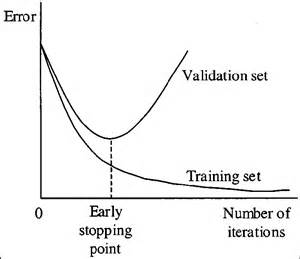


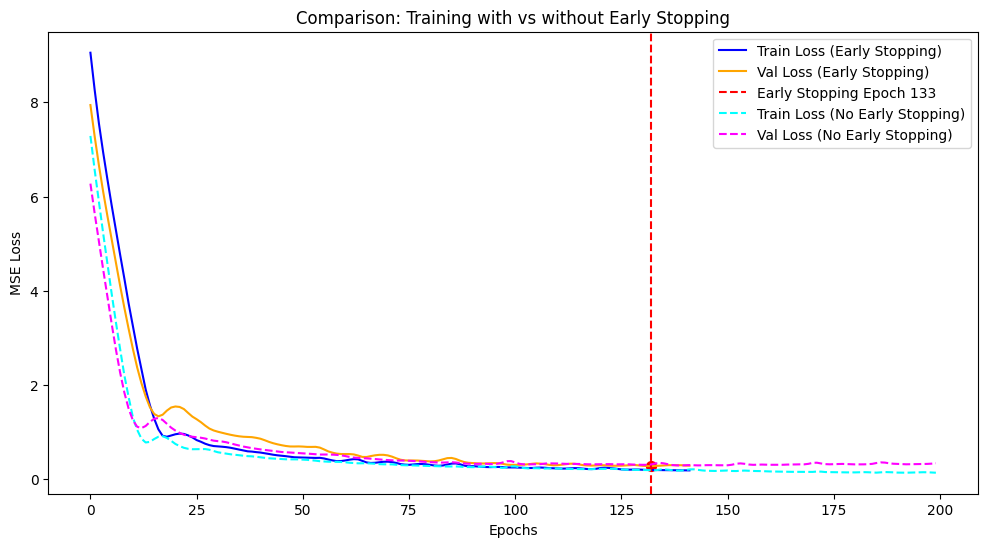

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# ---------------------------
# 1️⃣ Simulate dataset prone to overfitting
# ---------------------------
np.random.seed(42)
X = np.random.rand(50, 5)  # Small dataset
y = X @ np.array([2, -1, 3, 0, 1]) + np.random.randn(50) * 0.5  # Linear + noise

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# ---------------------------
# 2️⃣ Define EarlyStopping
# ---------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

# ---------------------------
# 3️⃣ Build over-parameterized model
# ---------------------------
def build_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# ---------------------------
# 4️⃣ Train with EarlyStopping
# ---------------------------
model_es = build_model()
history_es = model_es.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    callbacks=[early_stopping],
    verbose=0
)

# ---------------------------
# 5️⃣ Train without EarlyStopping
# ---------------------------
model_no_es = build_model()
history_no_es = model_no_es.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    verbose=0
)

# ---------------------------
# 6️⃣ Plot Comparison
# ---------------------------
plt.figure(figsize=(12,6))

# With Early Stopping
train_loss_es = history_es.history['loss']
val_loss_es = history_es.history['val_loss']
best_epoch = np.argmin(val_loss_es)

plt.plot(train_loss_es, label='Train Loss (Early Stopping)', color='blue')
plt.plot(val_loss_es, label='Val Loss (Early Stopping)', color='orange')
plt.axvline(best_epoch, color='red', linestyle='--', label=f'Early Stopping Epoch {best_epoch+1}')
plt.scatter(best_epoch, val_loss_es[best_epoch], color='red', s=50)

# Without Early Stopping
train_loss_no_es = history_no_es.history['loss']
val_loss_no_es = history_no_es.history['val_loss']
plt.plot(train_loss_no_es, '--', label='Train Loss (No Early Stopping)', color='cyan')
plt.plot(val_loss_no_es, '--', label='Val Loss (No Early Stopping)', color='magenta')

plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Comparison: Training with vs without Early Stopping')
plt.legend()
plt.show()

### ❇️ Explanation of the code:

1. **Dataset:** Creates a small synthetic dataset (50 samples, 5 features) with noise to encourage overfitting.
2. **Model:** Builds a large neural network (2 layers × 128 neurons) to make overfitting likely.
3. **EarlyStopping:** Monitors `val_loss`, stops training if no improvement for 10 epochs, and restores the best weights.
4. **Training:**
    - `model_es` → Trained **with early stopping**.
    - `model_no_es` → Trained **without early stopping**.
5. **Plotting:**
    - Solid lines → Loss curves with early stopping.
    - Dashed lines → Loss curves without early stopping.
    - Red line/dot → Epoch where early stopping stopped training.
6. **Result:** Shows how early stopping **prevents validation loss from increasing**, unlike full training where overfitting occurs.

This clearly visualizes **the effect of early stopping** compared to normal training.

---

## **Batch Normalization (BN)** 

A technique introduced in 2015 by Sergey Ioffe and Christian Szegedy to address challenges in training deep neural networks. It normalizes the inputs of each layer to have a mean of zero and a standard deviation of one, thereby stabilizing and accelerating the training process.

---

### 🔍 What Is Batch Normalization?

Batch Normalization operates by normalizing the activations of each layer within a mini-batch during training. This process involves:

1. **Computing the Mean and Variance**: For each feature across the mini-batch, the mean and variance are calculated.
2. **Normalizing the Activations**: The activations are normalized by subtracting the mean and dividing by the standard deviation.
3. **Scaling and Shifting**: Learnable parameters, γ (gamma) and β (beta), are introduced to scale and shift the normalized activations, allowing the model to adapt to the optimal activation distribution.

This technique helps in reducing internal covariate shift, where the distribution of each layer's inputs changes during training, making the training process more stable and faster.

---

### ⚙️ Mechanism and Formulas

Suppose we have a mini-batch of activations coming into a layer:

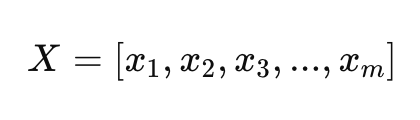

where:

- x_i = activation of the neuron for the i_th example in the mini-batch
- m = batch size (number of examples in the mini-batch)

---

### **Step 1: Compute the Mini-batch Mean**

The mean of the activations in the batch is calculated:

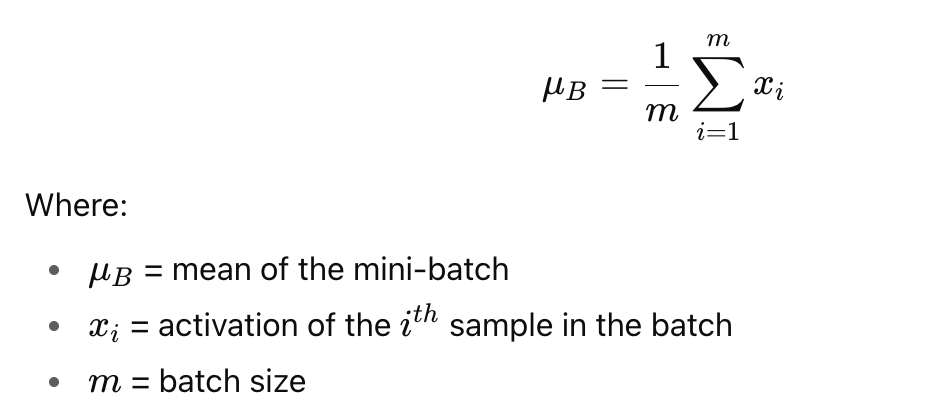

This gives us the **average activation** for the current batch.

---

### **Step 2: Compute the Mini-batch Variance**

Next, we compute the variance of the batch:

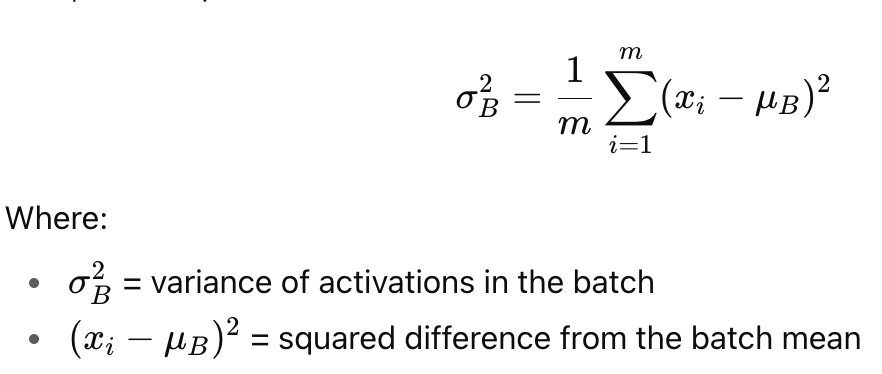

Variance measures how **spread out** the activations are.

---

### **Step 3: Normalize the Activations**

We normalize each activation to have **zero mean and unit variance**:

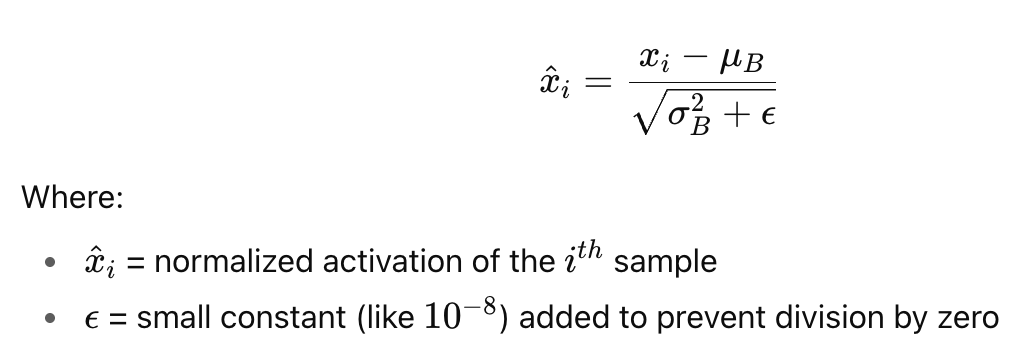

At this point, all activations in the batch have **mean = 0** and **variance = 1**.

---

### **Step 4: Scale and Shift**

Batch Normalization introduces **learnable parameters** γ (scale) and β (shift) to allow the network to restore the original distribution if needed:

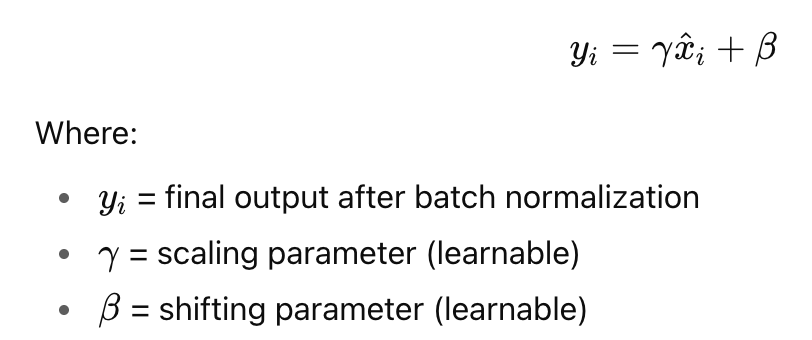

This ensures the network can still **represent complex functions**, not restricted to zero mean/unit variance.

---

### **Step 5: During Inference**

- **Training:** BN uses **batch statistics** (μB,σB2\mu_B, \sigma_B^2μB,σB2)
- **Inference:** BN uses **running averages** of μB\mu_BμB and σB2\sigma_B^2σB2 computed during training

This ensures the model behaves consistently during prediction, even for a single sample.

---

### 🔹 **Summary of Variables**

| Variable | Meaning |
| --- | --- |
| x_i | Activation of the neuron for the ithi^{th}ith sample in the batch |
| m | Batch size |
| μB | Mean of the batch |
| $σ^B$ | Variance of the batch |
| ϵ | Small constant to avoid division by zero |
| x^i | Normalized activation |
| γ | Learnable scale parameter |
| β | Learnable shift parameter |
| y_i| Final output after BN |

---
    
### **Step-by-Step Intuition**

1. Compute the mean of the batch → get average activation.
2. Compute variance → see how spread out activations are.
3. Normalize → center around 0 and scale to unit variance.
4. Scale & shift → let the model learn optimal distribution.
5. Use running averages for inference → ensure stable predictions.
   
---

### 🚀 Benefits of Batch Normalization

- **Accelerates Training**: By stabilizing the learning process, BN allows for higher learning rates and faster convergence.
- **Reduces Internal Covariate Shift**: Normalizing each layer's inputs helps in maintaining a stable distribution of activations throughout training.
- **Acts as a Regularizer**: BN introduces noise during training, which can have a regularizing effect, reducing the need for other regularization techniques like Dropout.
- **Mitigates Vanishing/Exploding Gradients**: By maintaining a stable distribution of activations, BN helps in preventing issues related to vanishing or exploding gradients.

---

### 🧠 Insights and Considerations

- **Training vs. Inference**: During training, BN uses the mean and variance of the current mini-batch. During inference, it uses running averages of these statistics computed during training.
- **Application in Convolutional Networks**: In convolutional layers, BN is applied per feature map, ensuring that each feature map has zero mean and unit variance.
- **Layer Placement**: BN is typically applied after the linear transformation (e.g., matrix multiplication) and before the activation function (e.g., ReLU).
- **Alternative Normalization Techniques**: While BN is widely used, other normalization techniques like Layer Normalization and Group Normalization can be considered, especially in scenarios where BN's assumptions do not hold.

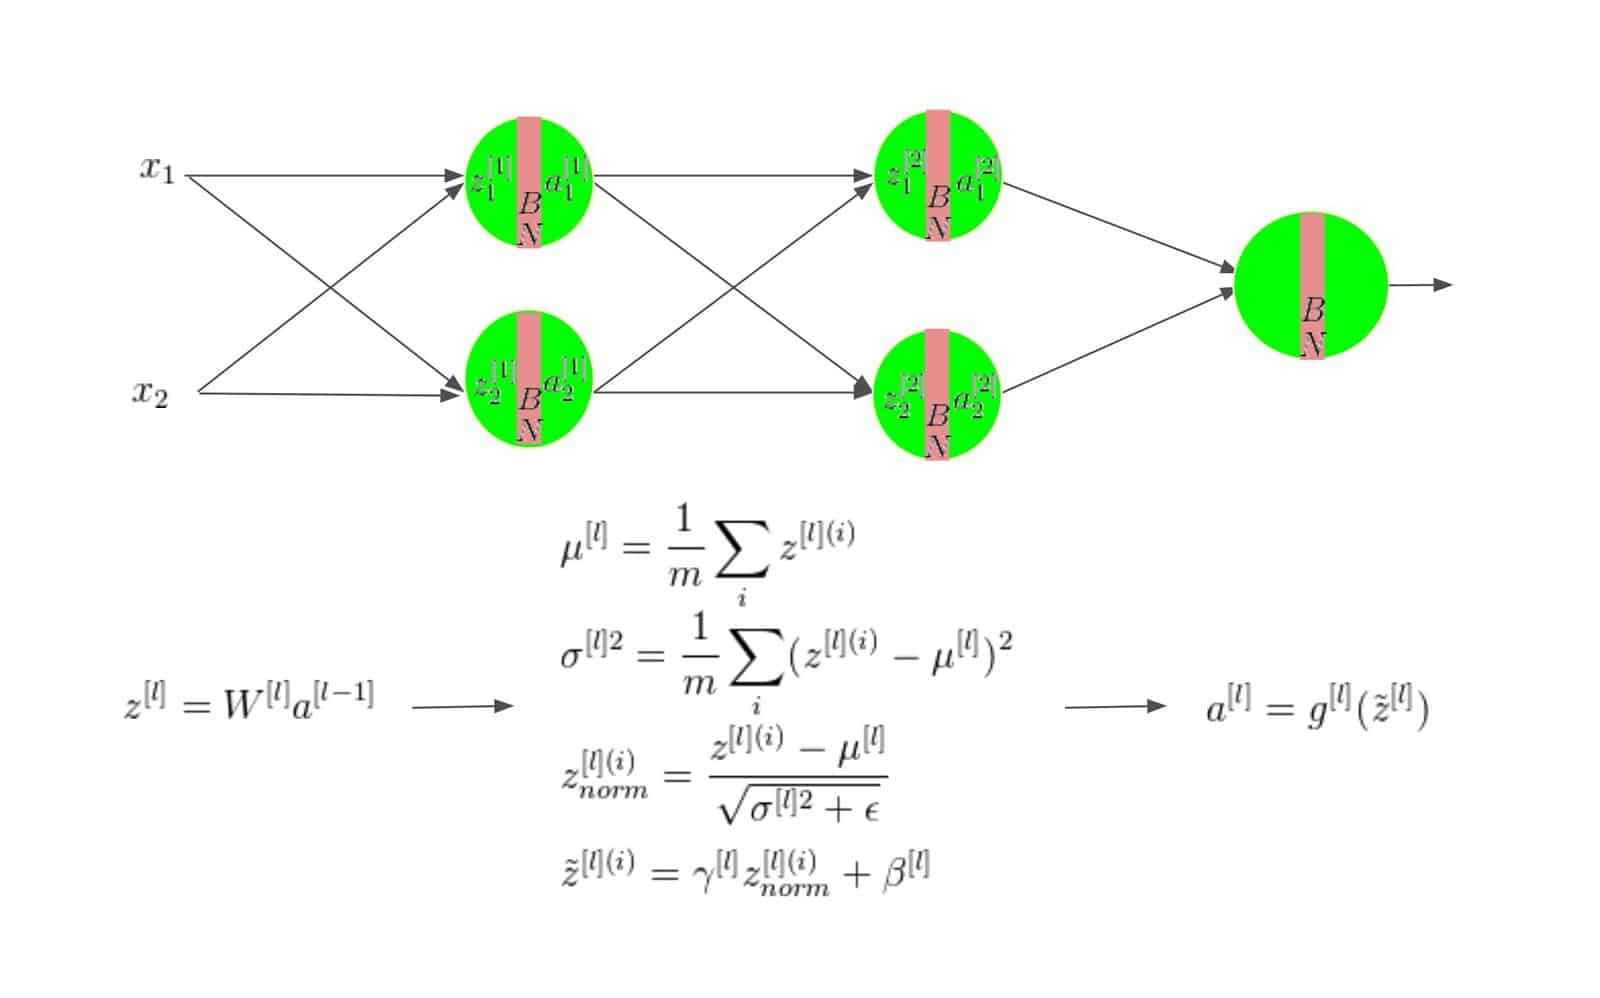

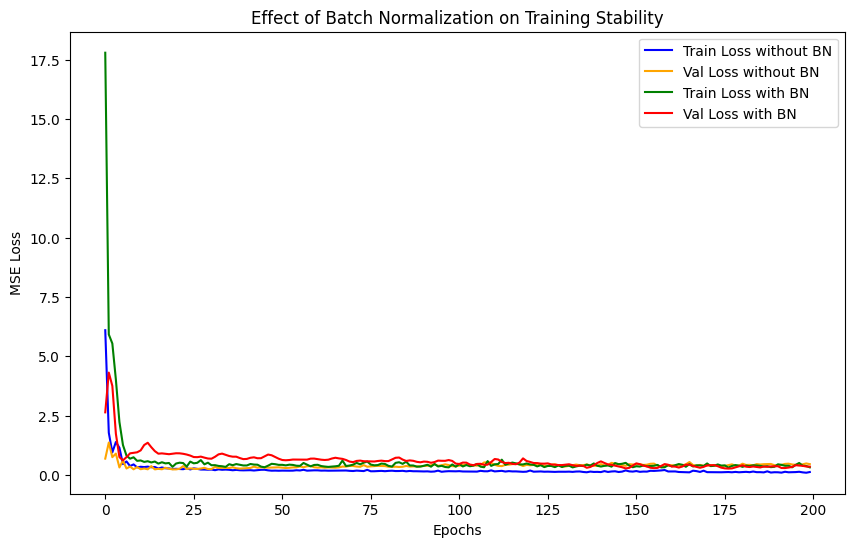

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# ---------------------------
# 1️⃣ Generate synthetic dataset
# ---------------------------
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = X @ np.array([2, -1, 3, 0, 1]) + np.random.randn(100) * 0.5

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# ---------------------------
# 2️⃣ Model WITHOUT Batch Normalization
# ---------------------------
model_no_bn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
])
model_no_bn.compile(optimizer=Adam(0.01), loss='mse')
history_no_bn = model_no_bn.fit(X_train, y_train, validation_data=(X_val, y_val),
                                epochs=200, verbose=0)

# ---------------------------
# 3️⃣ Model WITH Batch Normalization
# ---------------------------
model_bn = Sequential([
    Dense(128, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(128),
    BatchNormalization(),
    Dense(1, activation='linear')
])
model_bn.compile(optimizer=Adam(0.01), loss='mse')
history_bn = model_bn.fit(X_train, y_train, validation_data=(X_val, y_val),
                           epochs=200, verbose=0)

# ---------------------------
# 4️⃣ Plot Training vs Validation Loss
# ---------------------------
plt.figure(figsize=(10,6))

plt.plot(history_no_bn.history['loss'], label='Train Loss without BN', color='blue')
plt.plot(history_no_bn.history['val_loss'], label='Val Loss without BN', color='orange')

plt.plot(history_bn.history['loss'], label='Train Loss with BN', color='green')
plt.plot(history_bn.history['val_loss'], label='Val Loss with BN', color='red')

plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Effect of Batch Normalization on Training Stability')
plt.legend()
plt.show()

### ✅ **Explanation**

1. **Dataset:** Small synthetic dataset with 5 features and noisy linear relation.
2. **Model without BN:** Standard deep network with 2 dense layers → may show unstable or slower convergence.
3. **Model with BN:** Adds `BatchNormalization()` **after each Dense layer before activation**, stabilizing activations.
4. **Plot:**
    - Blue/Orange → Train/Val loss **without BN**
    - Green/Red → Train/Val loss **with BN**
5. **Observation:**
    - With BN, training is smoother, faster, and validation loss is more stable.
    - Without BN, loss may oscillate or converge slower.

---

## 📘 What is a Learning Rate Scheduler?

A **Learning Rate Scheduler** is a technique used to adjust the learning rate during training to improve model convergence and performance. By dynamically changing the learning rate, we can better handle the plateaus and sudden changes that training a complex model often demands. 

---

## 🔍 Why Use a Learning Rate Scheduler?

- **Faster Convergence**: Starting with a higher learning rate allows the model to converge quickly in the initial stages.
- **Avoiding Local Minima**: A decaying learning rate helps in fine-tuning the model, allowing it to settle into a global minimum.
- **Improved Generalization**: Proper scheduling can lead to better model performance on unseen data.

---

## 🔄 Types of Learning Rate Schedulers

### 1. **Step Decay**

Reduces the learning rate by a constant factor every few epochs.

**Formula**:

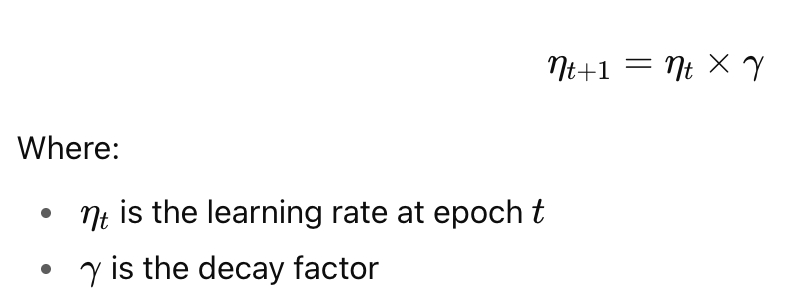

**Example**:

Reduce the learning rate by a factor of 0.1 every 10 epochs.

### 2. **Exponential Decay**

Reduces the learning rate exponentially over time.

**Formula**:

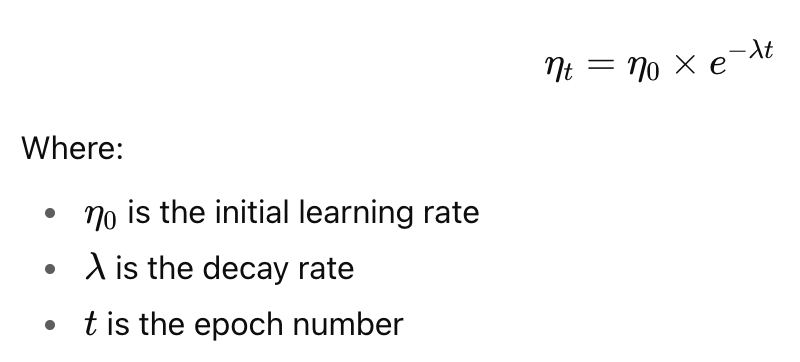

**Example**:

Decay the learning rate by 5% every epoch.

### 3. **ReduceLROnPlateau**

Reduces the learning rate when a metric has stopped improving. This is useful when the model's performance plateaus.

**Parameters**:

- `mode`: 'min' or 'max' (whether the quantity to be monitored should be minimized or maximized)
- `factor`: Factor by which the learning rate will be reduced.
- `patience`: Number of epochs with no improvement after which learning rate will be reduced.

**Example**:

If the validation loss does not improve for 10 consecutive epochs, reduce the learning rate by a factor of 0.1.

### 4. **OneCycleLR**

Increases the learning rate initially to a maximum value and then decreases it, following a cyclical pattern.

**Benefits**:

- Helps in faster convergence.
- Reduces the risk of overfitting.

**Example**:

Cycle the learning rate between 1e-7 and 1e-2 over the course of training.

### 5. **Cosine Annealing**

Gradually decreases the learning rate following a cosine function.

**Formula**:

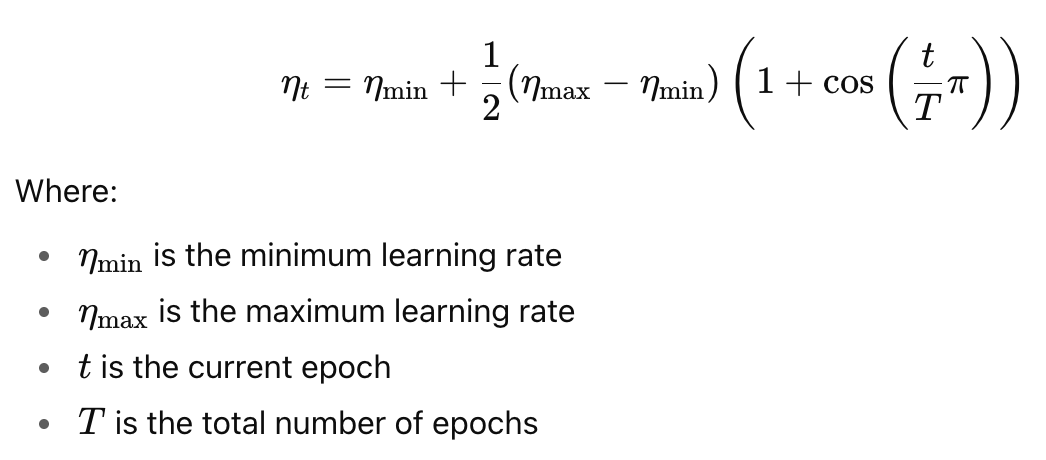

**Example**:

Start with a learning rate of 0.1 and gradually decrease it to 0 over 100 epochs.

---

## ✅ Best Practices

- **Start with a higher learning rate**: This allows the model to converge quickly in the initial stages.
- **Use a scheduler**: Implementing a learning rate scheduler can help in fine-tuning the model and avoiding local minima.
- **Monitor performance**: Keep an eye on validation loss and adjust the scheduler parameters accordingly.
- **Experiment with different schedulers**: Different tasks may benefit from different scheduling strategies.

---

## 🔹 Learning Rate Scheduler Mechanism

The **learning rate (η)** controls how much we update the model’s weights in each step:

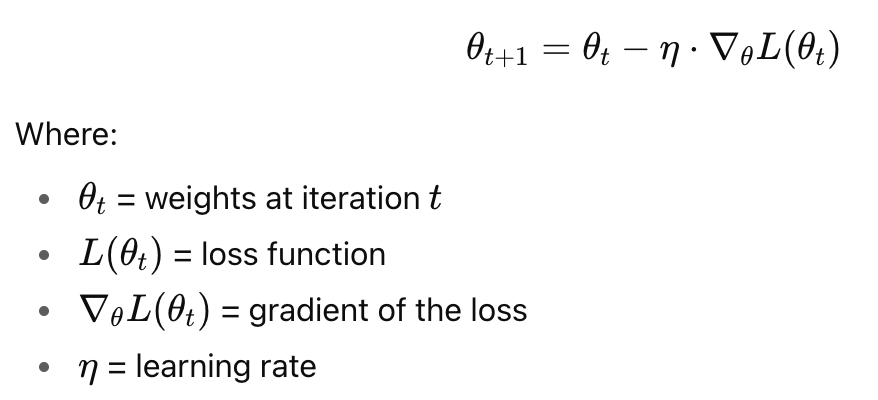

A **learning rate scheduler** modifies η\etaη dynamically during training to optimize convergence.

---

### **Step-by-Step Mechanism**

1. **Initial Learning Rate**
    - Training starts with an initial learning rate η0\eta_0η0.
    - If η0 is too high → risk of overshooting minima
    - If η0 is too low → slow convergence
2. **Scheduler Updates the Learning Rate**
    - At each epoch or batch, the scheduler computes the new learning rate ηt using its rule:
    
    **Examples:**
    
    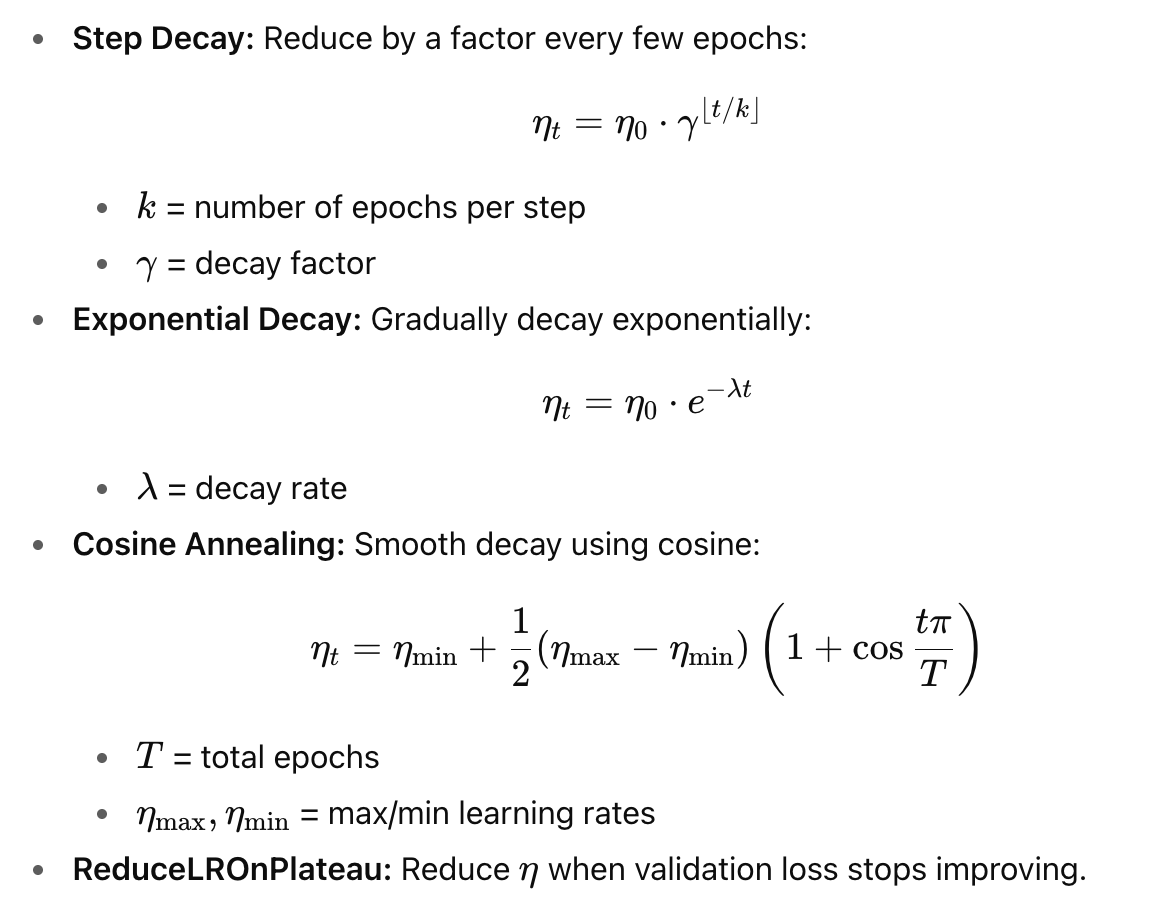
   
4. **Update Model Weights**
    - The optimizer uses the updated learning rate ηt\eta_tηt to perform weight updates:
      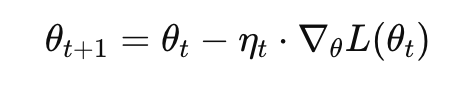
        
5. **Repeat Until Training Ends**
    - This process continues for every epoch/batch until the training ends.
    - Dynamic adjustment allows faster convergence initially and finer updates near minima.

---

### **Intuition Behind Schedulers**

- **High LR initially** → helps jump over shallow minima and speeds up learning
- **Decaying LR gradually** → allows precise fine-tuning near global minima
- **Adaptive schedules** (ReduceLROnPlateau, OneCycle) → respond to model performance dynamically

---

✅ **Key Points:**

- LR scheduler is **not a new optimizer**, it’s a **helper to the optimizer**.
- Mechanism ensures **fast convergence + stable fine-tuning**.
- Works well with **early stopping**, **batch normalization**, and other optimization techniques.

---

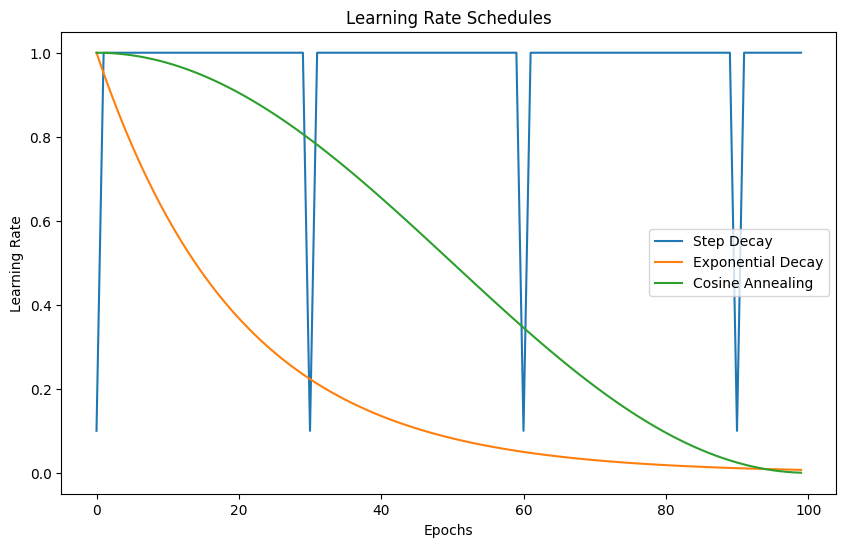

In [34]:
import numpy as np
import matplotlib.pyplot as plt

epochs = np.arange(0, 100)

# Step Decay
step_decay = np.where(epochs % 30 == 0, 0.1, 1)

# Exponential Decay
exp_decay = np.exp(-0.05 * epochs)

# Cosine Annealing
cos_annealing = 0.5 * (1 + np.cos(np.pi * epochs / 100))

plt.figure(figsize=(10, 6))
plt.plot(epochs, step_decay, label='Step Decay')
plt.plot(epochs, exp_decay, label='Exponential Decay')
plt.plot(epochs, cos_annealing, label='Cosine Annealing')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.title('Learning Rate Schedules')
plt.show()

This code **plots three learning rate schedules** over 100 epochs:

- **Step Decay:** LR drops suddenly every 30 epochs.
- **Exponential Decay:** LR decreases smoothly and exponentially.
- **Cosine Annealing:** LR follows a smooth cosine curve from high to low
  
---

# 📊 Evaluation Metrics in Machine Learning

In machine learning, **evaluation metrics** are quantitative measures used to assess the performance of a model. They help answer questions like:

- How accurate is my model?
- How well does it handle different classes?
- Are certain types of errors more frequent than others?

Choosing the **right evaluation metric** is crucial because it directly affects how we interpret a model’s success, optimize its performance, and make decisions based on its predictions.

Evaluation metrics differ depending on whether the task is **classification** or **regression**. For classification tasks, the most commonly used metrics are **Accuracy, Precision, Recall, F1 Score, and the Confusion Matrix**.

---

## 🔹 1. Confusion Matrix

The **Confusion Matrix** is a table that allows us to visualize the performance of a classification model by comparing predicted labels with true labels. It’s especially helpful for understanding the types of errors the model makes.

### Structure (Binary Classification)

|  | **Predicted Positive** | **Predicted Negative** |
| --- | --- | --- |
| **Actual Positive** | True Positive (TP) | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN) |

### Explanation of Terms

- **True Positive (TP):** Model predicts positive and it is actually positive.
- **True Negative (TN):** Model predicts negative and it is actually negative.
- **False Positive (FP):** Model predicts positive but it is actually negative (Type I error).
- **False Negative (FN):** Model predicts negative but it is actually positive (Type II error).

### Uses

- Identifies misclassifications.
- Forms the basis for computing other metrics like Precision, Recall, and F1 Score.
- Helps detect model bias toward a particular class.

---

## ✅ 2. Accuracy

**Accuracy** measures the proportion of correct predictions among all predictions.

### Formula

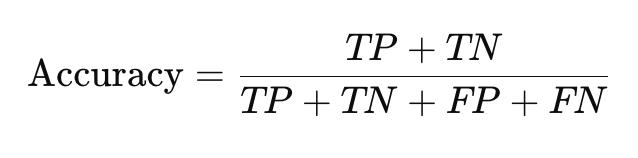

### When to Use

- When classes are **balanced** (roughly equal number of instances per class).
- Provides a general overview of model performance.

### Limitations

- Misleading for **imbalanced datasets**.
    - Example: If 95% of the data is negative, a model predicting all negatives achieves 95% accuracy but fails to detect positives.

---

## 🎯 3. Precision

**Precision** (Positive Predictive Value) measures how accurate the positive predictions are.

### Formula

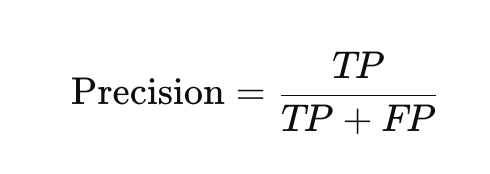

### When to Use

- Important when **false positives are costly**.
    - Example: In spam detection, marking a legitimate email as spam is bad.

### Interpretation

- High Precision → Few false positives.
- Low Precision → Many false positives.

---

## 📈 4. Recall (Sensitivity / True Positive Rate)

**Recall** measures how well the model identifies all actual positive instances.

### Formula

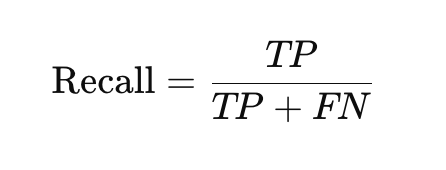

### When to Use

- Important when **false negatives are costly**.
    - Example: In medical diagnoses, missing a positive case can be dangerous.

### Interpretation

- High Recall → Model captures most positive instances.
- Low Recall → Model misses many positives.

---

## ⚖️ 5. F1 Score

The **F1 Score** combines Precision and Recall into a single metric using the harmonic mean. It balances the trade-off between false positives and false negatives.

### Formula

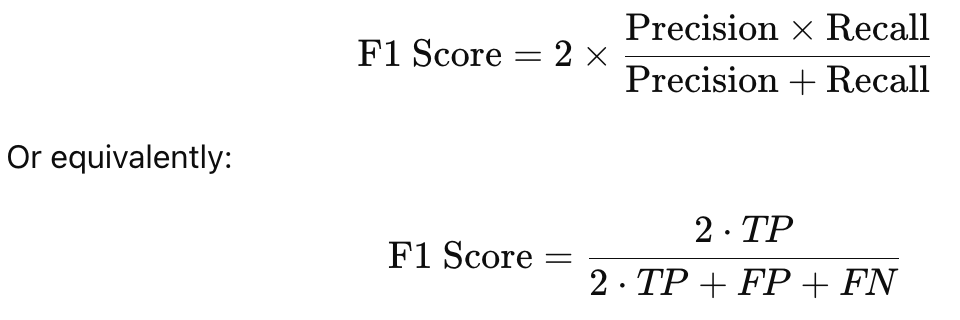

### When to Use

- When **both false positives and false negatives are important**.
- Particularly useful for **imbalanced datasets**.

---

## 🧪 6. Mechanism of How These Metrics Work

1. **Compute TP, TN, FP, FN** from predictions and actual labels using a confusion matrix.
2. **Calculate metrics**:
    - Accuracy → Overall correctness.
    - Precision → Positive prediction correctness.
    - Recall → Ability to detect positives.
    - F1 → Combined measure of Precision and Recall.
3. **Interpret results**:
    - Identify model strengths and weaknesses.
    - Detect class bias.
    - Make decisions to improve performance (e.g., adjusting thresholds, balancing classes).


## 🧠 7. Practical Example

Suppose a model predicts whether patients have a disease (Positive) or not (Negative):

|  | Predicted Positive | Predicted Negative |
| --- | --- | --- |
| **Actual Positive** | 50 (TP) | 5 (FN) |
| **Actual Negative** | 10 (FP) | 100 (TN) |

- **Accuracy:** $(50+100)/165≈0.909 → 90.9% $correct overall.
- **Precision:** $50/(50+10)≈0.833 → 83.3%$ of positive predictions are correct.
- **Recall:** $50/(50+5)≈0.909 → 90.9%$ of actual positives detected.
- **F1 Score:** $2∗(0.833∗0.909)/(0.833+0.909)≈0.869$ → balanced metric.


## 🧪 Summary Table

| Metric | Formula | Use Case | Limitation |
| --- | --- | --- | --- |
| Accuracy | 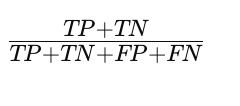 | Balanced classes | Misleading with imbalanced classes |
| Precision | 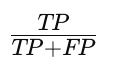 | Cost of false positives is high | Ignores false negatives |
| Recall |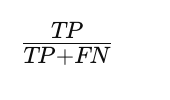 | Cost of false negatives is high | Ignores false positives |
| F1 Score | 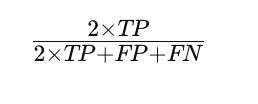 | Balance between Precision and Recall | Assumes equal importance of Precision and Recall |

### ✅ Key Points

- **Always interpret metrics together**—no single metric gives the full picture.
- **Use F1 Score** when classes are imbalanced or you need a balance between false positives and false negatives.
- **Use the confusion matrix** to visualize and understand misclassifications.
- **Choose metrics based on your problem domain**:
    - Fraud detection → prioritize Recall (catch frauds)
    - Email spam → prioritize Precision (avoid false positives)

## 🧠 Conclusion

- **Accuracy** is best when classes are balanced but can be misleading in imbalanced datasets.
- **Precision** is crucial when false positives are costly.
- **Recall** is vital when false negatives are costly.
- **F1 Score** provides a balance between Precision and Recall, especially useful in imbalanced datasets.
- The **Confusion Matrix** offers a detailed breakdown of model performance, aiding in the calculation of these metrics.

Understanding and selecting the appropriate evaluation metric is essential for assessing and improving the performance of machine learning models.

---

Accuracy : 0.878
Precision: 0.911
Recall   : 0.854
F1 Score : 0.882

Confusion Matrix:
 [[38  4]
 [ 7 41]]


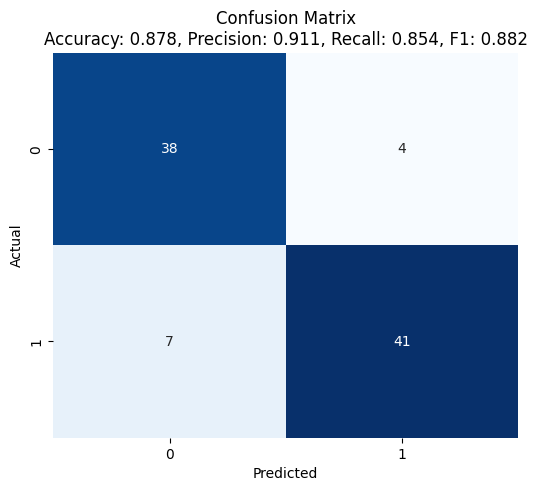

In [65]:
# ------------------------------
# 1️⃣ Import Libraries
# ------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# ------------------------------
# 2️⃣ Create Synthetic Dataset
# ------------------------------
X, y = make_classification(
    n_samples=300, 
    n_features=5, 
    n_informative=3, 
    n_redundant=0, 
    n_classes=2, 
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ------------------------------
# 3️⃣ Train a Classifier
# ------------------------------
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ------------------------------
# 4️⃣ Compute Evaluation Metrics
# ------------------------------
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy :", round(acc, 3))
print("Precision:", round(prec, 3))
print("Recall   :", round(rec, 3))
print("F1 Score :", round(f1, 3))
print("\nConfusion Matrix:\n", cm)

# ------------------------------
# 5️⃣ Plot Confusion Matrix
# ------------------------------
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}')
plt.show()

### **Explanation**

- **`make_classification`**: Generates a synthetic binary classification dataset.
- **`RandomForestClassifier`**: Trains a simple model.
- **Metrics**:
    - **Accuracy** → Overall correctness
    - **Precision** → Correctness of positive predictions
    - **Recall** → Ability to detect positives
    - **F1 Score** → Harmonic mean of Precision and Recall
- **Confusion Matrix Plot**: Shows TP, TN, FP, FN with metric values in the title.